In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("nacimiento.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10038 entries, 0 to 10037
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ANO                          10038 non-null  int64  
 1   PERIODO DE REPORTE           10038 non-null  int64  
 2   SEXO                         10038 non-null  object 
 3   PESO (Gramos)                10037 non-null  float64
 4   TALLA (CentImetros)          10037 non-null  float64
 5   FECHA NACIMIENTO             10038 non-null  object 
 6   PARTO ATENDIDO POR           10038 non-null  object 
 7   TIEMPO DE GESTACION          10031 non-null  float64
 8   NUMERO CONSULTAS PRENATALES  10038 non-null  int64  
 9   TIPO PARTO                   10038 non-null  object 
 10  MULTIPLICIDAD EMBARAZO       10038 non-null  object 
 11  APGAR1                       10016 non-null  float64
 12  APGAR2                       10016 non-null  float


Valores faltantes por columna:
ANO                              0
PERIODO DE REPORTE               0
SEXO                             0
PESO (Gramos)                    1
TALLA (CentImetros)              1
FECHA NACIMIENTO                 0
PARTO ATENDIDO POR               0
TIEMPO DE GESTACION              7
NUMERO CONSULTAS PRENATALES      0
TIPO PARTO                       0
MULTIPLICIDAD EMBARAZO           0
APGAR1                          22
APGAR2                          22
GRUPO SANGUINEO                  0
FACTOR RH                        0
PERTENENCIA ETNICA               0
EDAD MADRE                       0
ESTADO CONYUGAL MADRE            0
NIVEL EDUCATIVO MADRE            0
ULTIMO ANO APROBADO MADRE      179
PAIS RESIDENCIA                  0
DEPARTAMENTO RESIDENCIA          0
MUNICIPIO RESIDENCIA             0
AREA RESIDENCIA                  0
LOCALIDAD                      223
NUMERO HIJOS NACIDOS VIVOS       0
NUMERO EMBARAZOS                 0
REGIMEN SEGURIDAD      

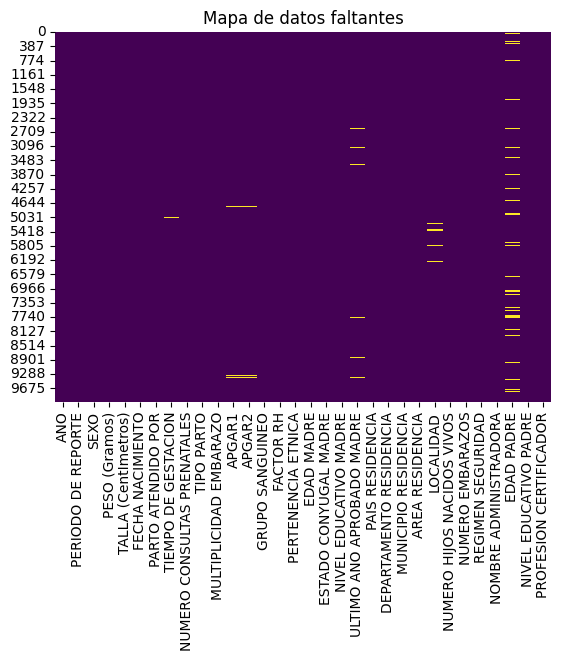

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()


Número de filas después de eliminar datos faltantes: 8969

Datos faltantes por columna después de la limpieza:
ANO                            0
PERIODO DE REPORTE             0
SEXO                           0
PESO (Gramos)                  0
TALLA (CentImetros)            0
FECHA NACIMIENTO               0
PARTO ATENDIDO POR             0
TIEMPO DE GESTACION            0
NUMERO CONSULTAS PRENATALES    0
TIPO PARTO                     0
MULTIPLICIDAD EMBARAZO         0
APGAR1                         0
APGAR2                         0
GRUPO SANGUINEO                0
FACTOR RH                      0
PERTENENCIA ETNICA             0
EDAD MADRE                     0
ESTADO CONYUGAL MADRE          0
NIVEL EDUCATIVO MADRE          0
ULTIMO ANO APROBADO MADRE      0
PAIS RESIDENCIA                0
DEPARTAMENTO RESIDENCIA        0
MUNICIPIO RESIDENCIA           0
AREA RESIDENCIA                0
LOCALIDAD                      0
NUMERO HIJOS NACIDOS VIVOS     0
NUMERO EMBARAZOS              

/tmp/ipython-input-1209801244.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


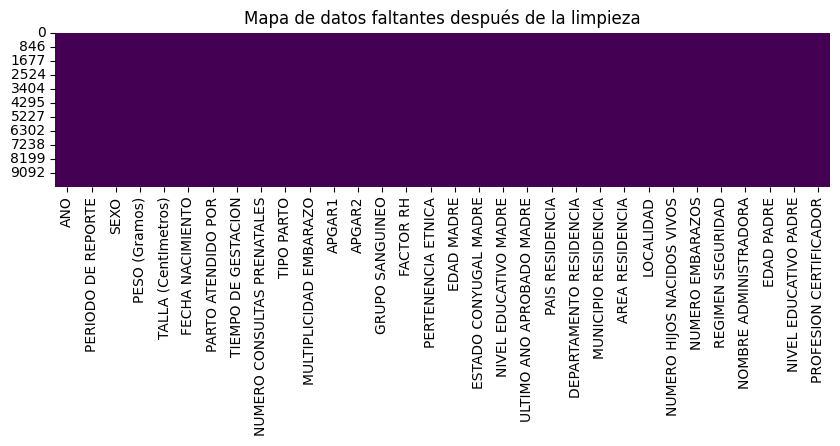

In [ ]:
# 3. Eliminar filas con datos faltantes y verificar limpieza

# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()


Analyzing column: SEXO


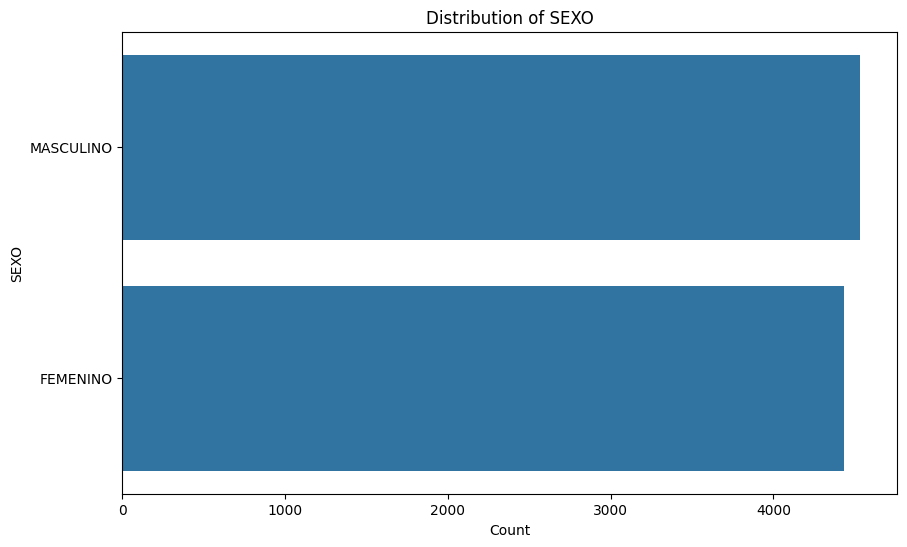

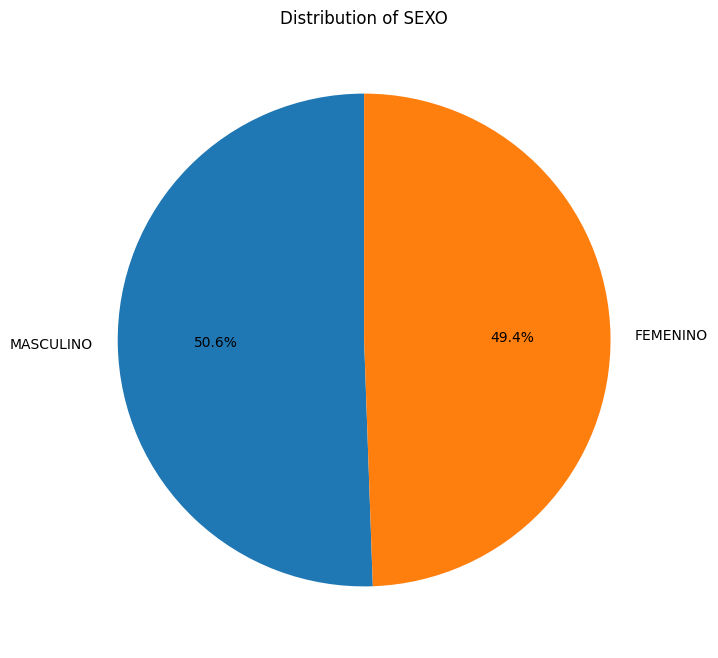


Analyzing column: PARTO ATENDIDO POR


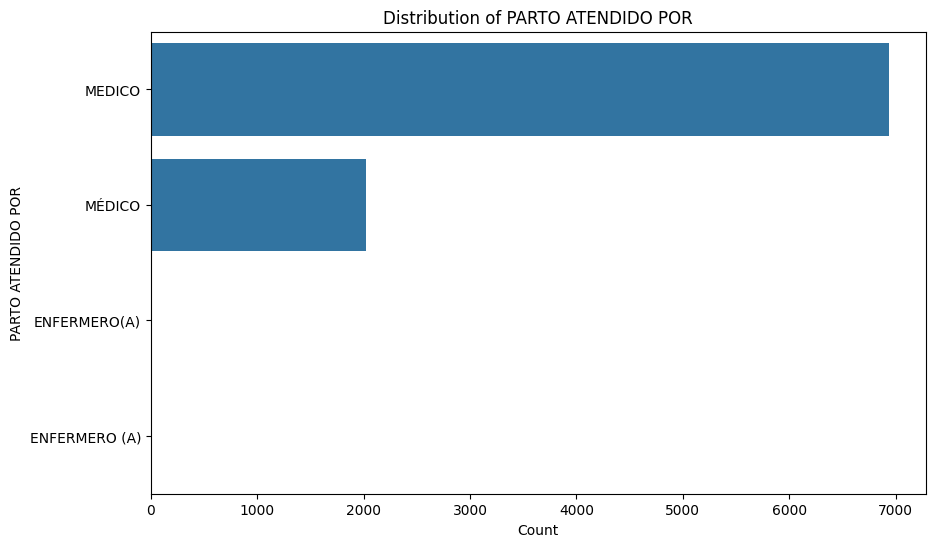

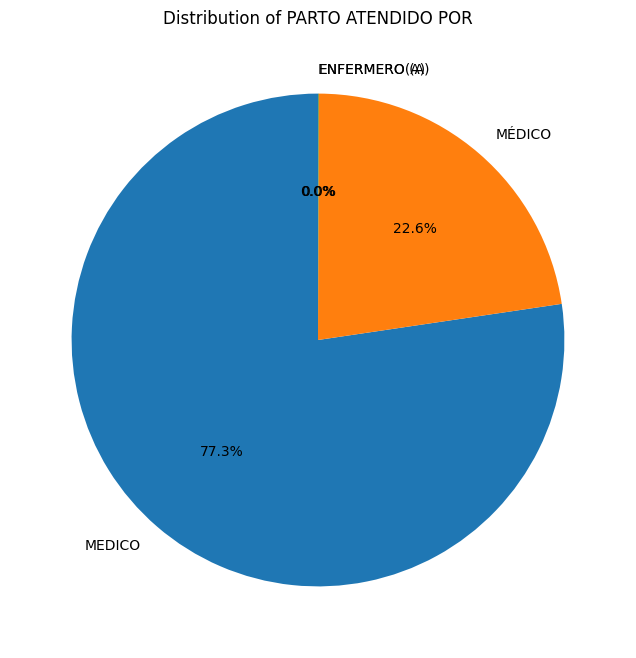


Analyzing column: TIPO PARTO


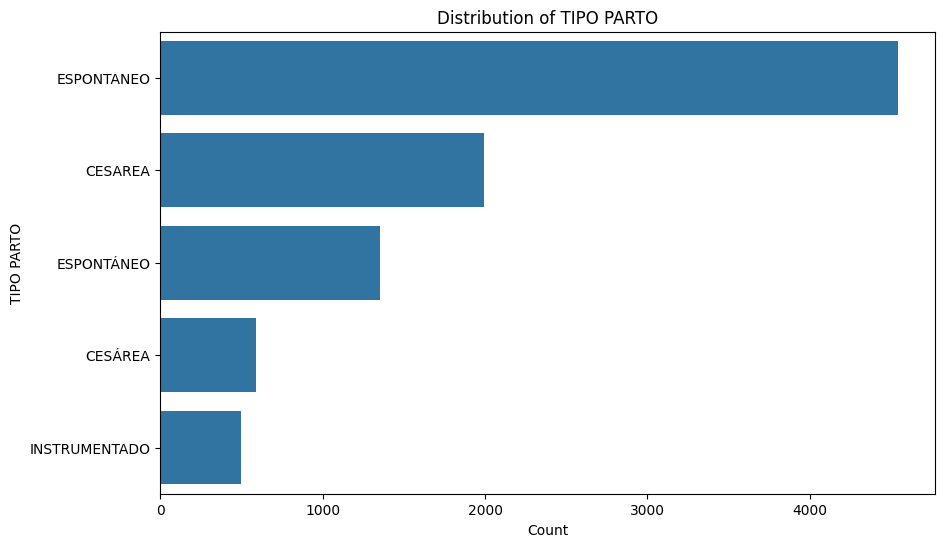

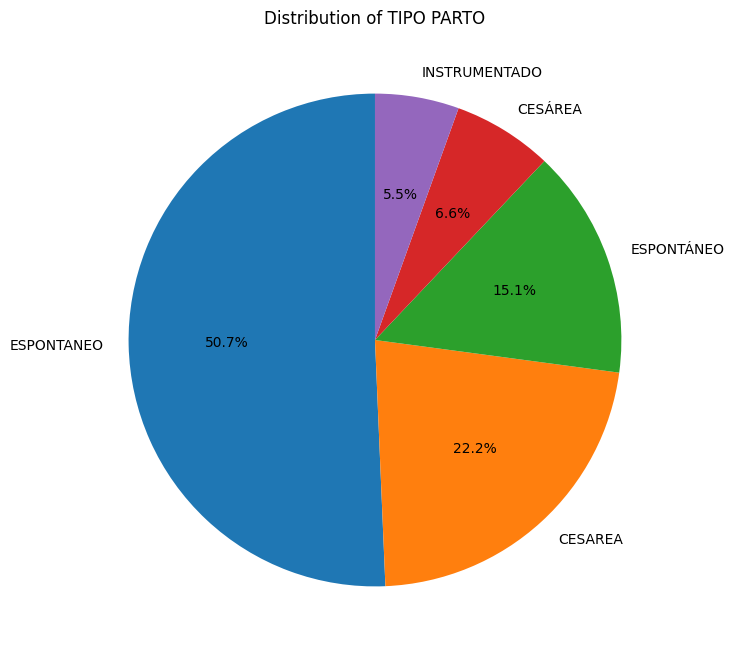


Analyzing column: MULTIPLICIDAD EMBARAZO


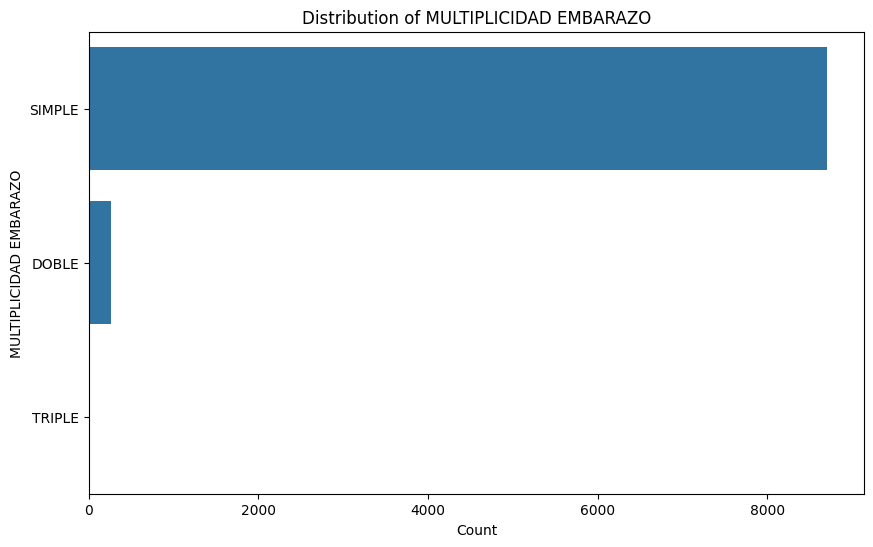

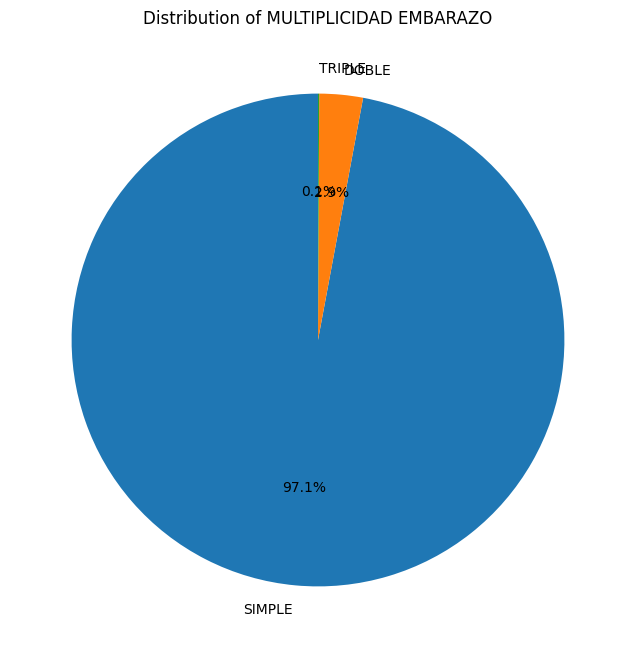


Analyzing column: GRUPO SANGUINEO


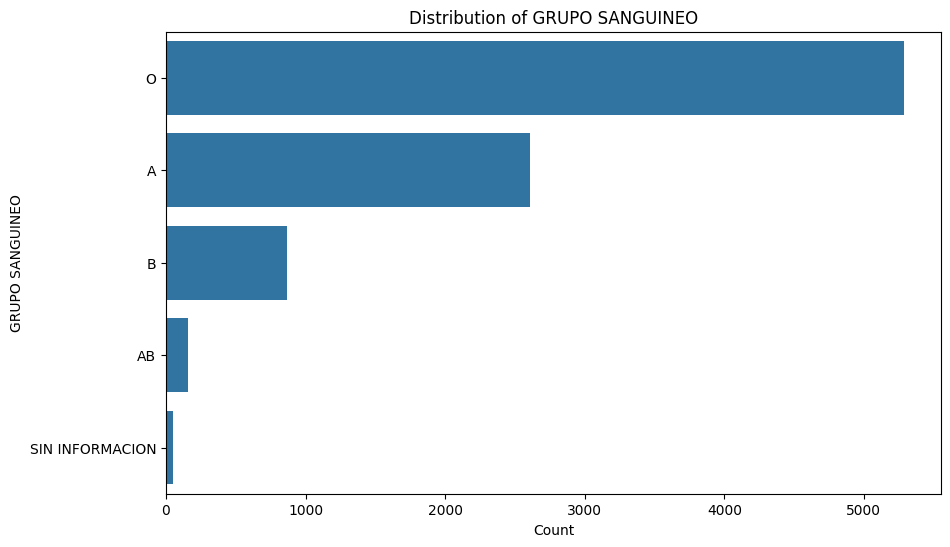

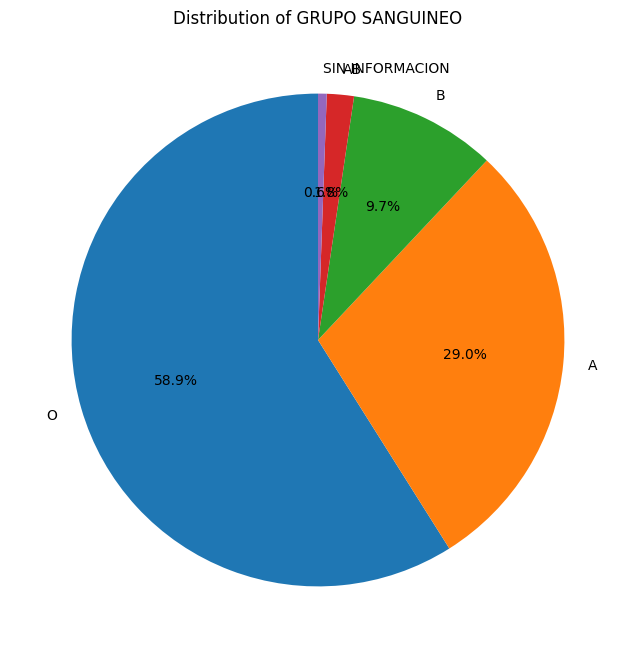


Analyzing column: FACTOR RH


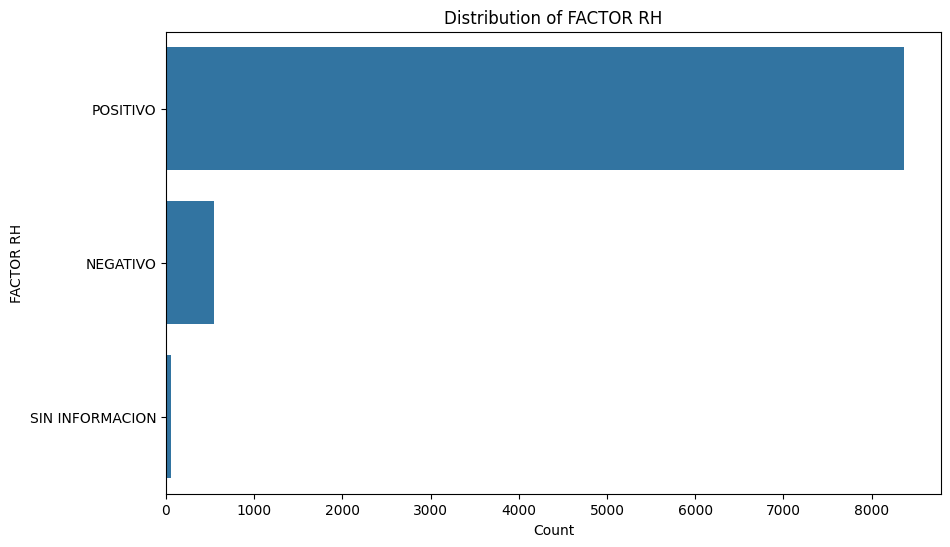

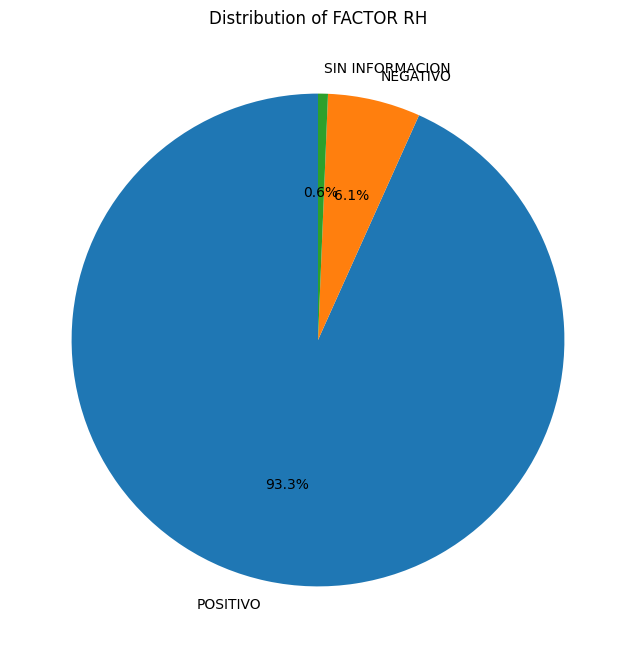


Analyzing column: PERTENENCIA ETNICA


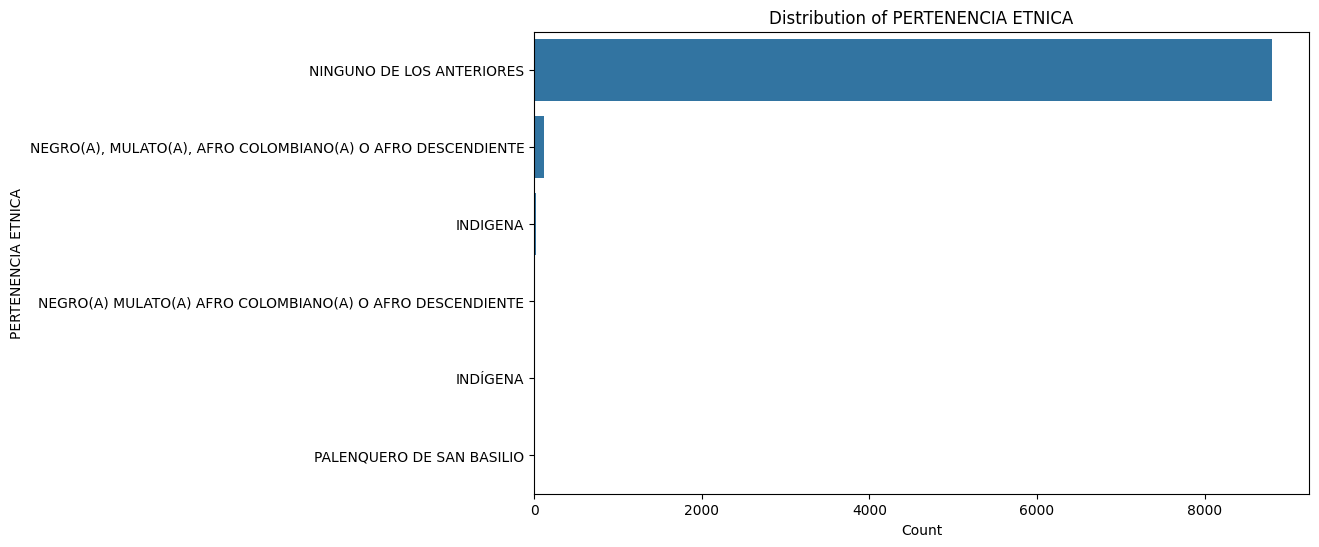

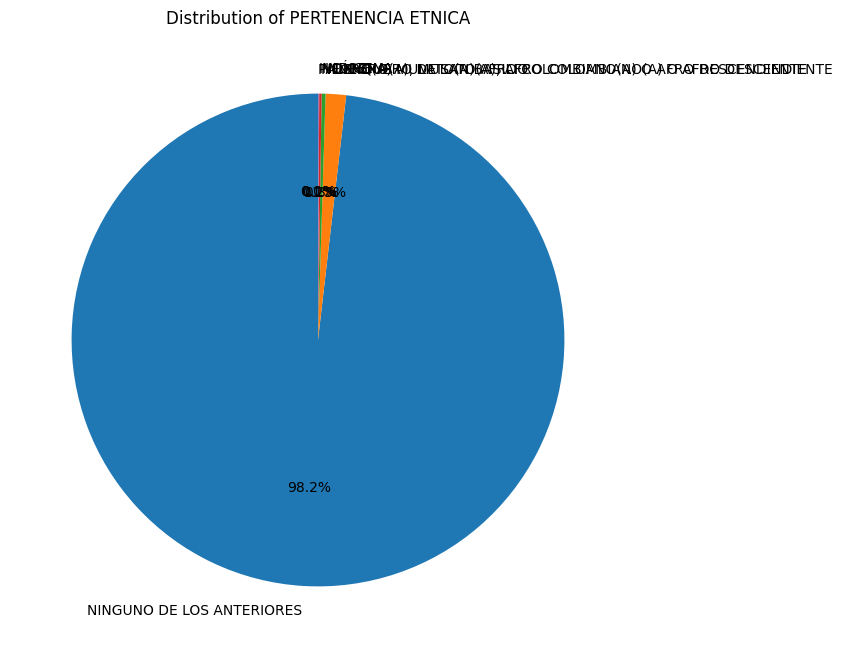


Analyzing column: ESTADO CONYUGAL MADRE


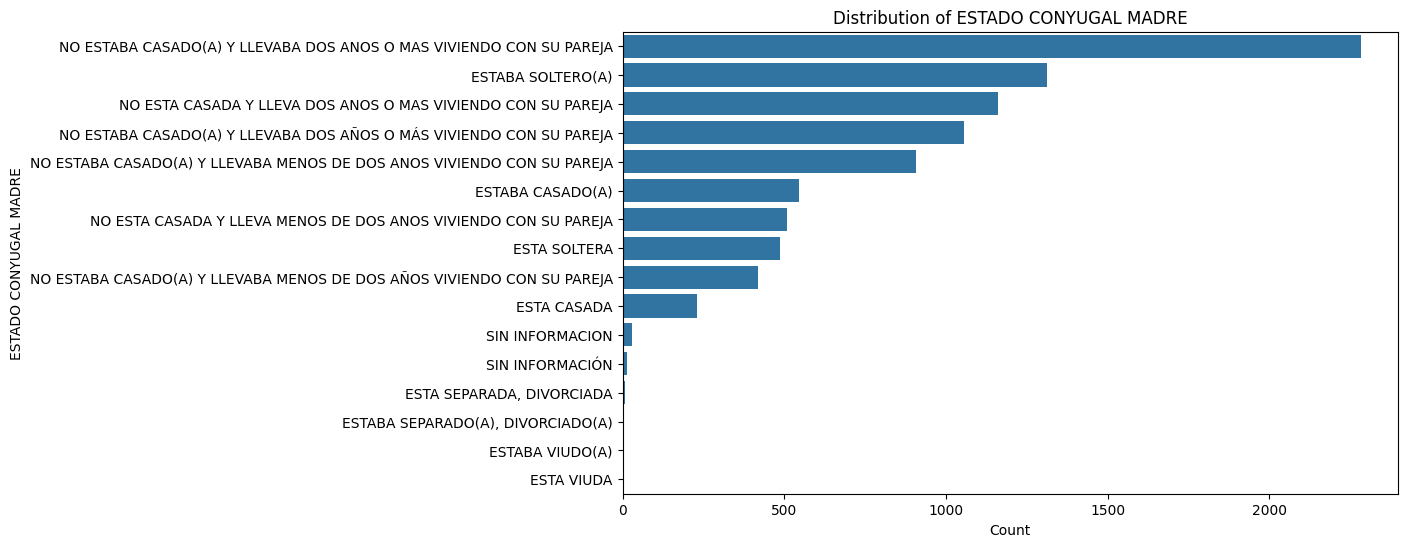

Skipping pie chart for ESTADO CONYUGAL MADRE due to high number of unique values (16)

Analyzing column: NIVEL EDUCATIVO MADRE


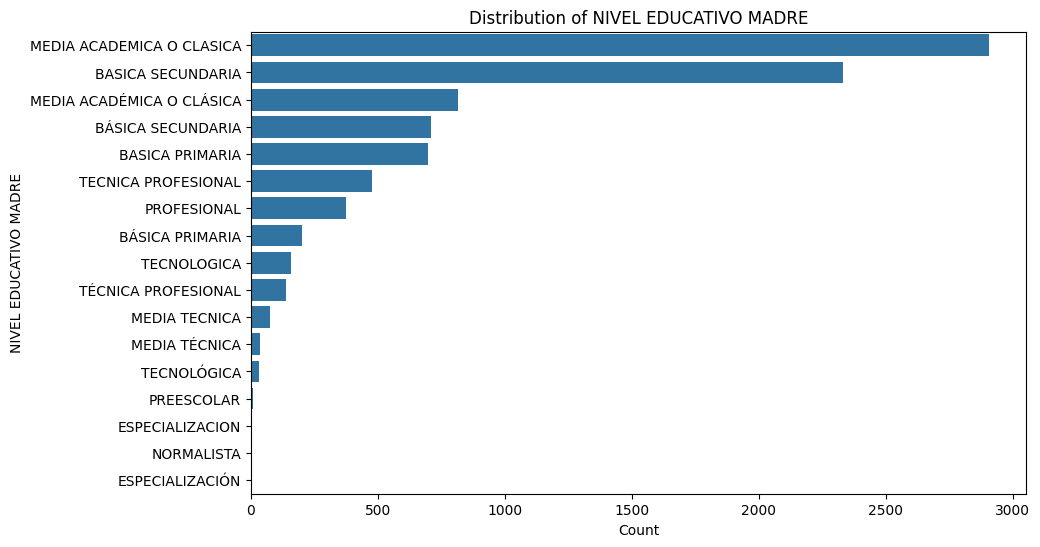

Skipping pie chart for NIVEL EDUCATIVO MADRE due to high number of unique values (17)

Analyzing column: AREA RESIDENCIA


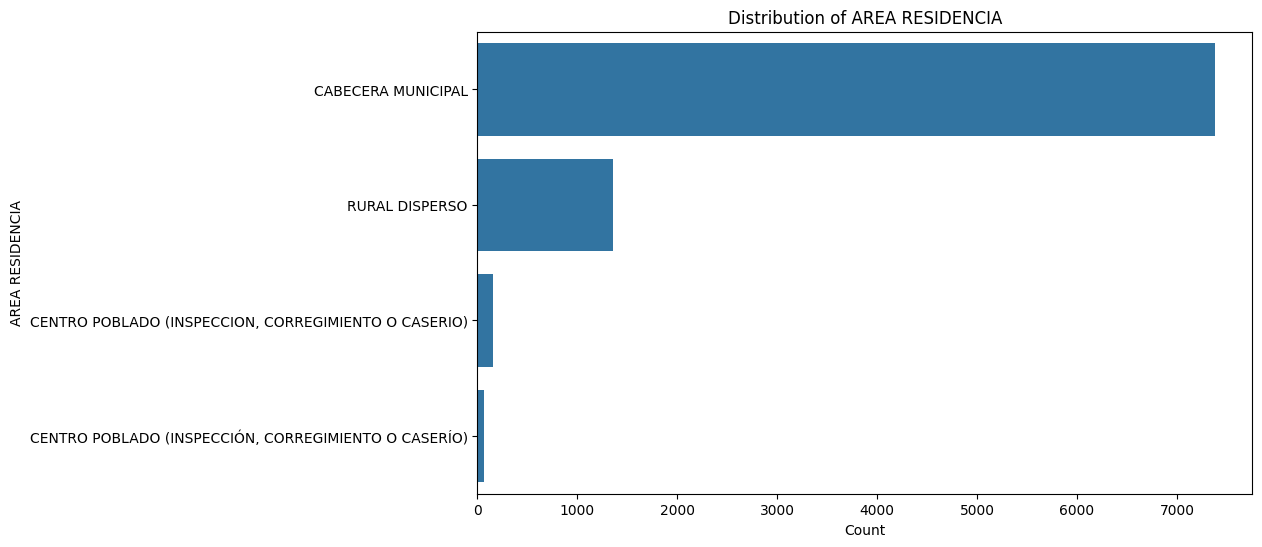

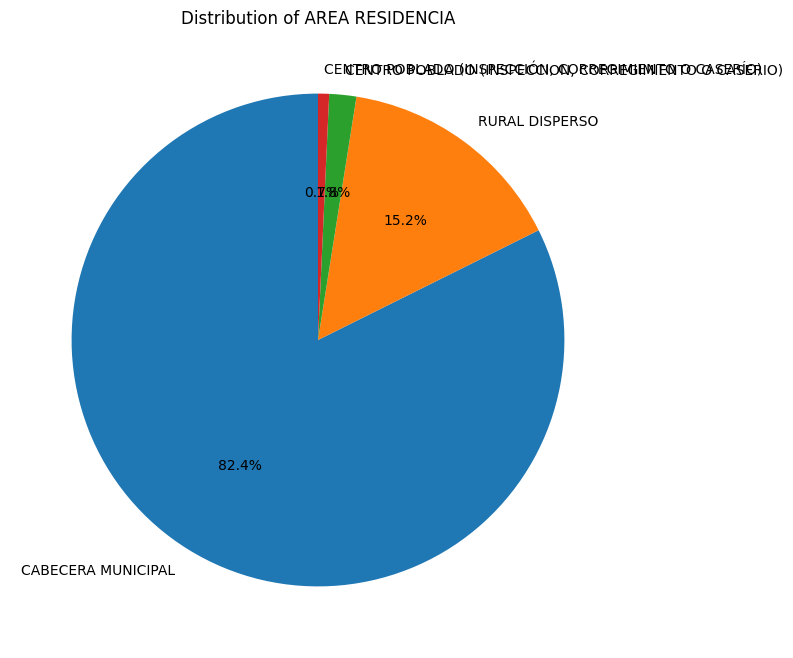


Analyzing column: REGIMEN SEGURIDAD


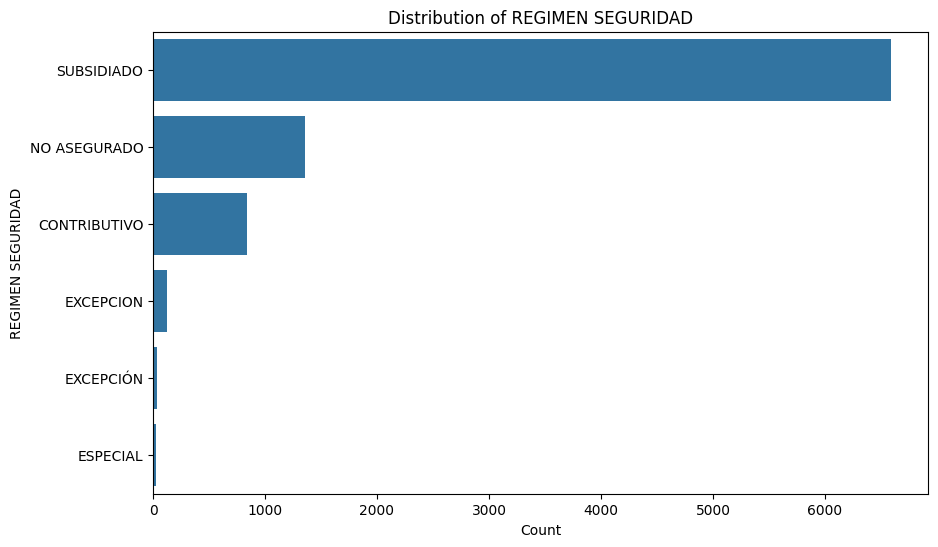

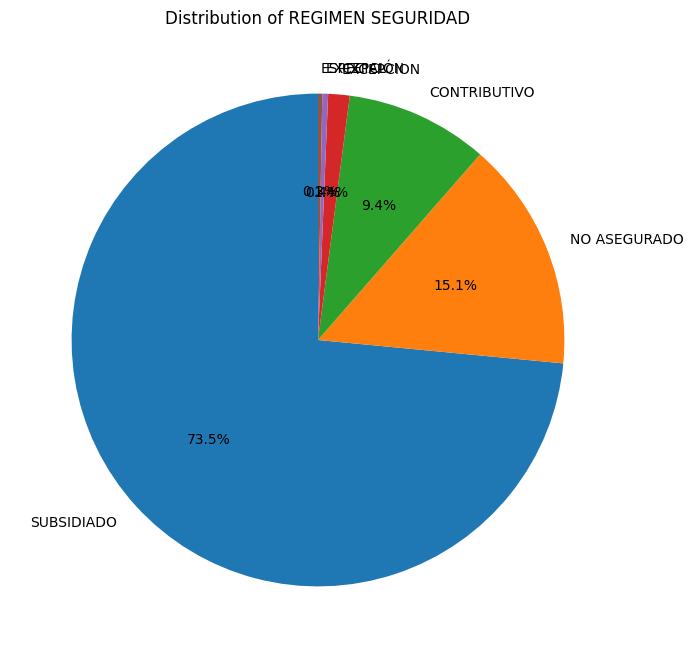


Analyzing column: NIVEL EDUCATIVO PADRE


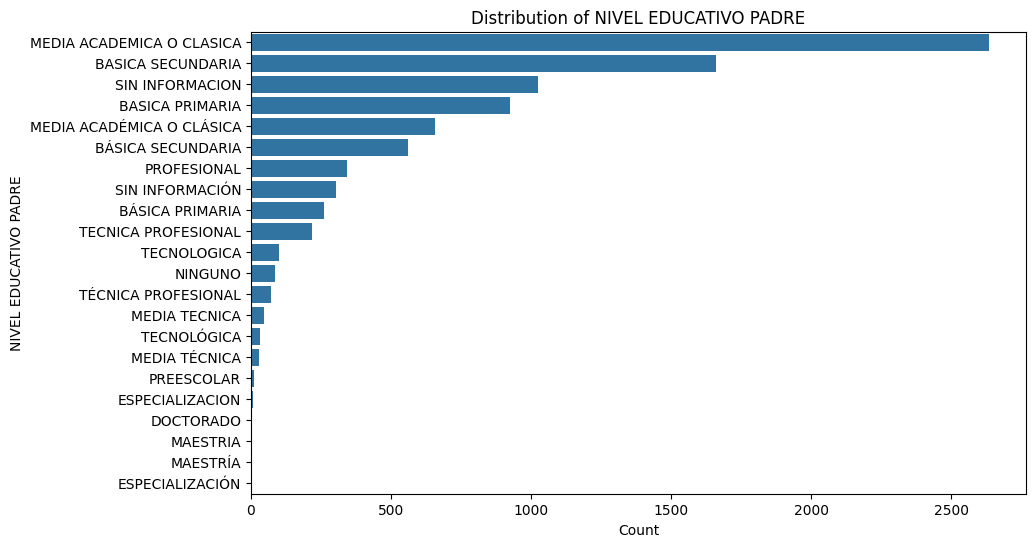

Skipping pie chart for NIVEL EDUCATIVO PADRE due to high number of unique values (22)

Analyzing column: PROFESION CERTIFICADOR


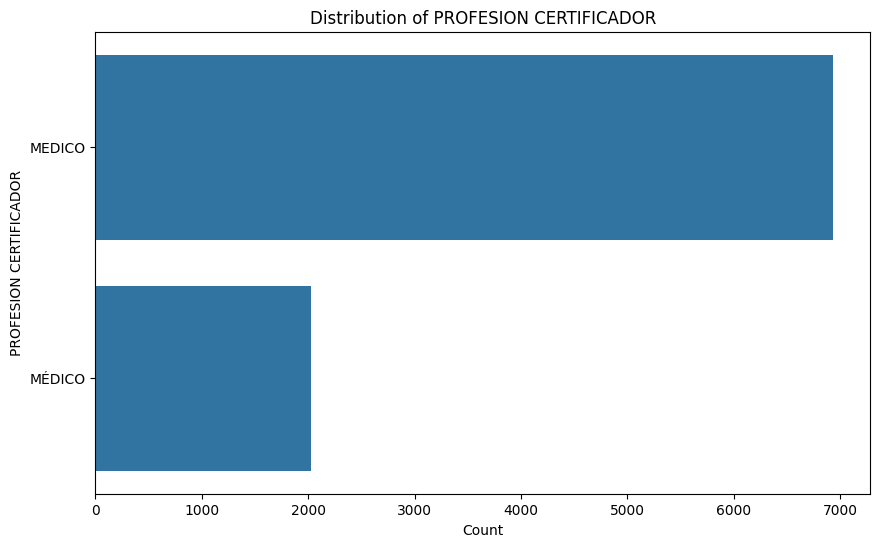

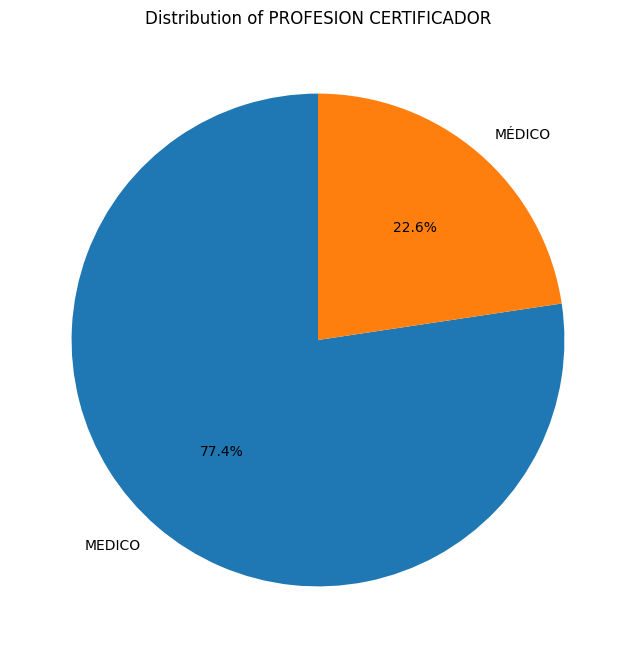

In [ ]:
# Identify categorical columns (excluding columns that are clearly numerical or date-like)
categorical_cols = df_filtrado.select_dtypes(include='object').columns.tolist()

# Exclude potentially high-cardinality or non-categorical columns based on domain knowledge
# 'FECHA NACIMIENTO' is a date and was dropped
# 'PAIS RESIDENCIA', 'DEPARTAMENTO RESIDENCIA', 'MUNICIPIO RESIDENCIA', 'LOCALIDAD' might have high cardinality
# 'NOMBRE ADMINISTRADORA' might also have high cardinality

# Based on the head and info output, the following columns seem suitable for plotting
categorical_cols_to_plot = [
    'SEXO',
    'PARTO ATENDIDO POR',
    'TIPO PARTO',
    'MULTIPLICIDAD EMBARAZO',
    'GRUPO SANGUINEO',
    'FACTOR RH',
    'PERTENENCIA ETNICA',
    'ESTADO CONYUGAL MADRE',
    'NIVEL EDUCATIVO MADRE',
    'AREA RESIDENCIA',
    'REGIMEN SEGURIDAD',
    'NIVEL EDUCATIVO PADRE',
    'PROFESION CERTIFICADOR'
]

for col in categorical_cols_to_plot:
    print(f"\nAnalyzing column: {col}")

    # Bar Chart
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtrado, y=col, order=df_filtrado[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

    # Pie Chart (only for columns with a reasonable number of categories)
    if df_filtrado[col].nunique() <= 15: # Limit pie charts to columns with 15 or fewer unique values
        plt.figure(figsize=(8, 8))
        df_filtrado[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribution of {col}')
        plt.ylabel('')  # Hide the default ylabel
        plt.show()
    else:
        print(f"Skipping pie chart for {col} due to high number of unique values ({df_filtrado[col].nunique()})")


Analyzing column: PESO (Gramos)


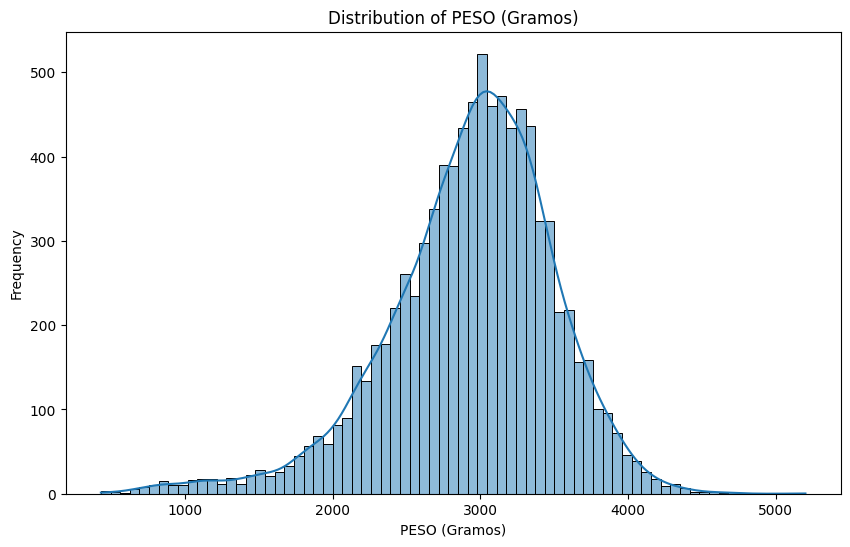

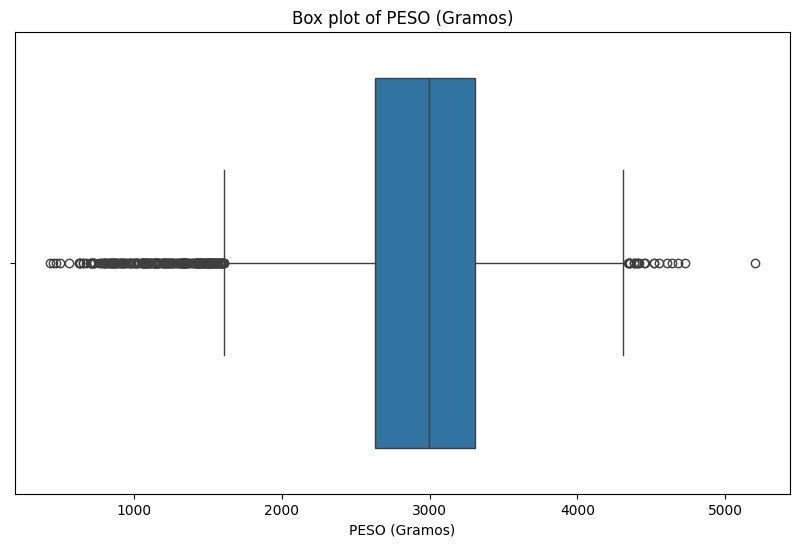


Analyzing column: TALLA (CentImetros)


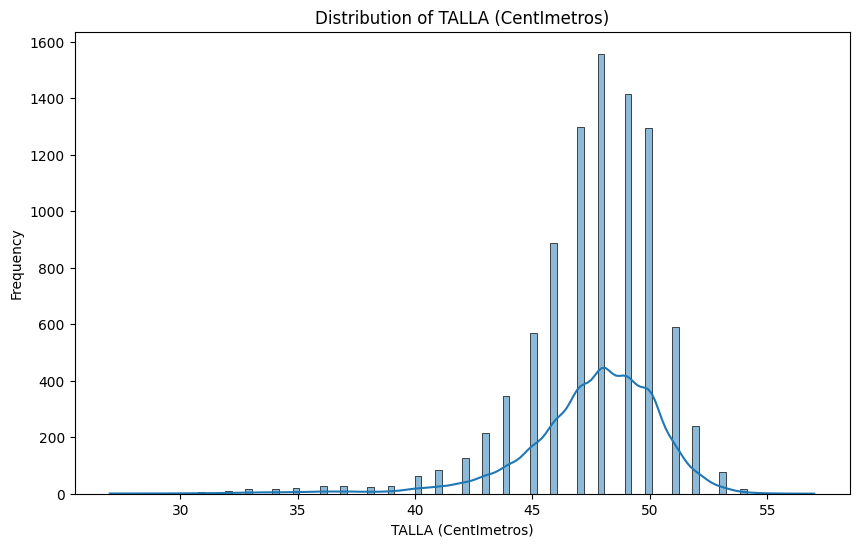

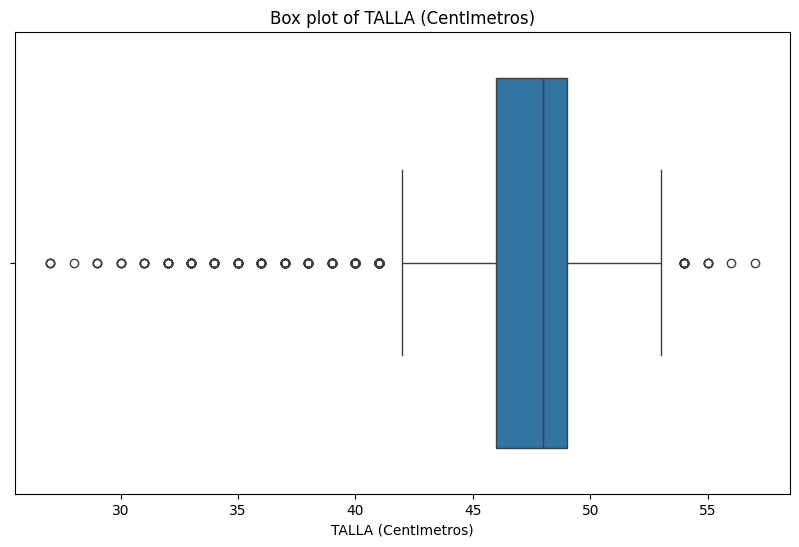


Analyzing column: TIEMPO DE GESTACION


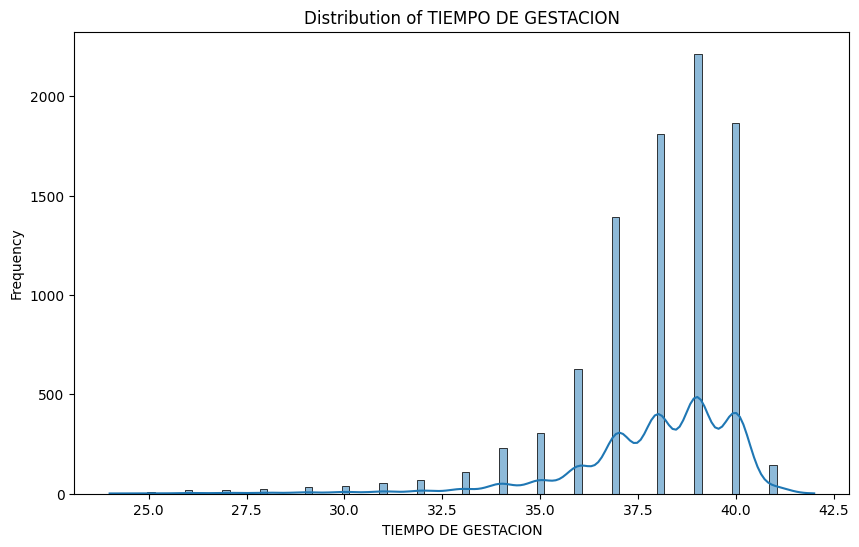

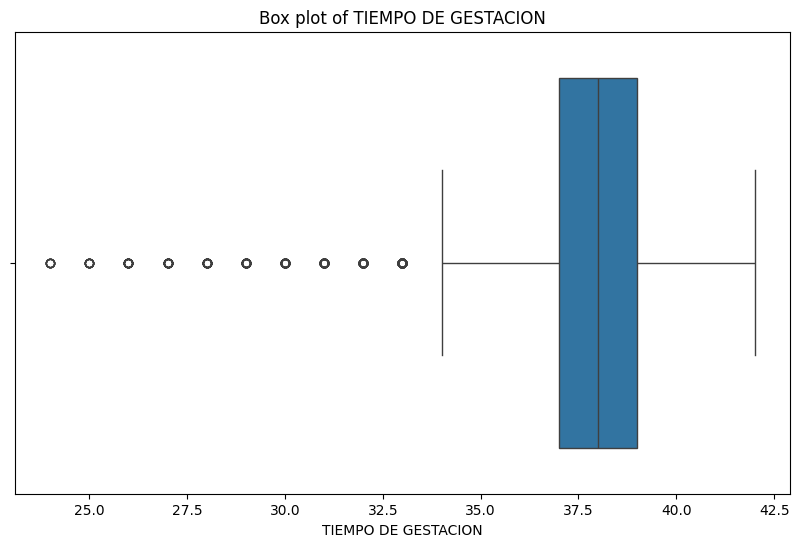


Analyzing column: NUMERO CONSULTAS PRENATALES


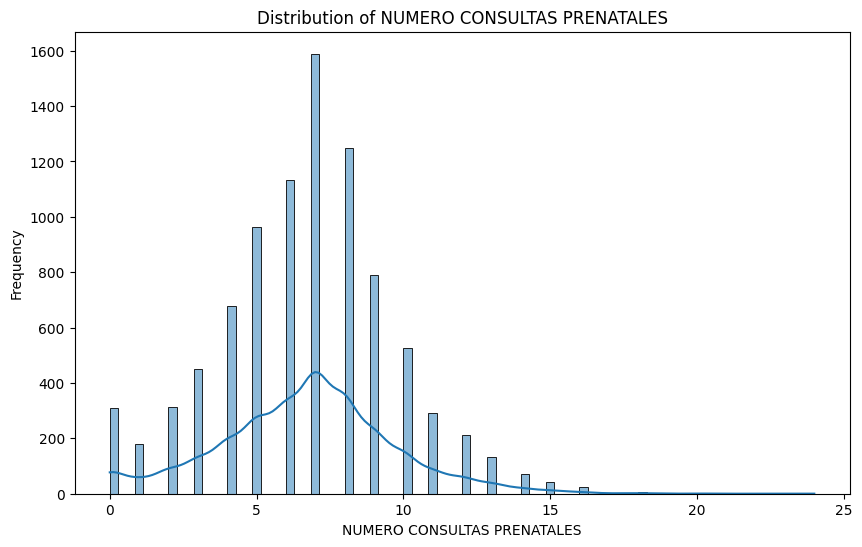

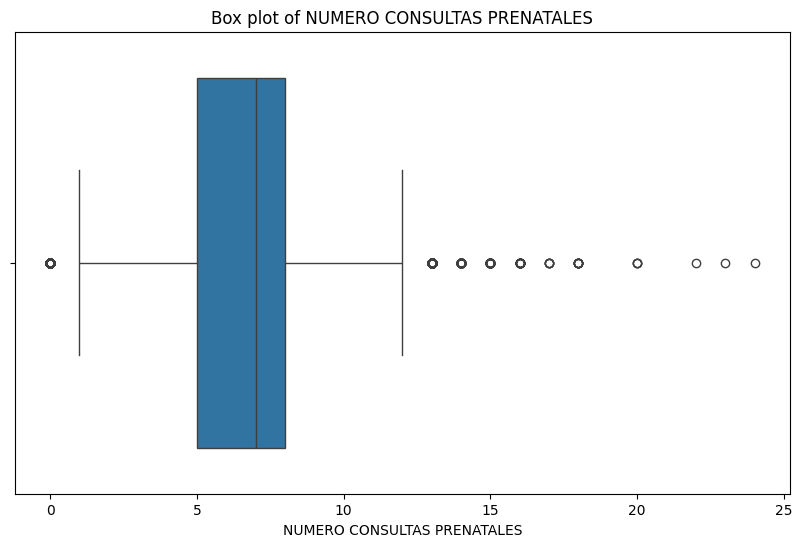


Analyzing column: APGAR1


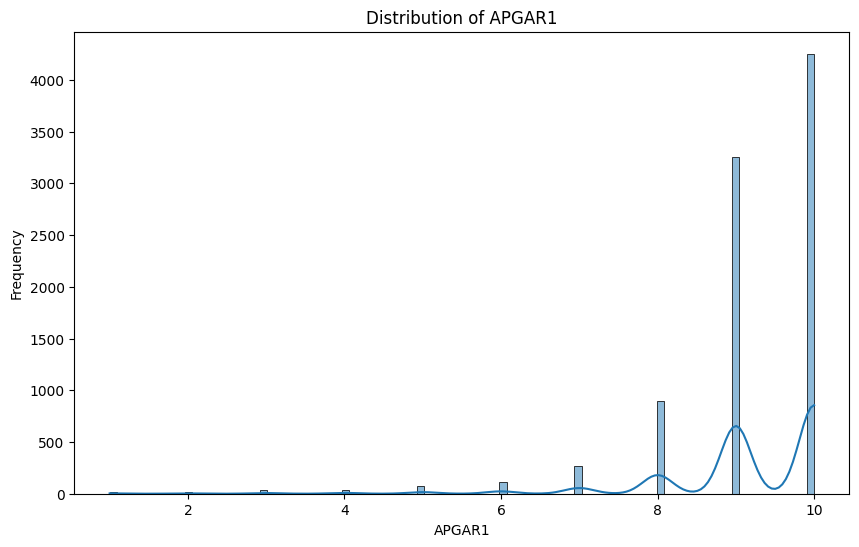

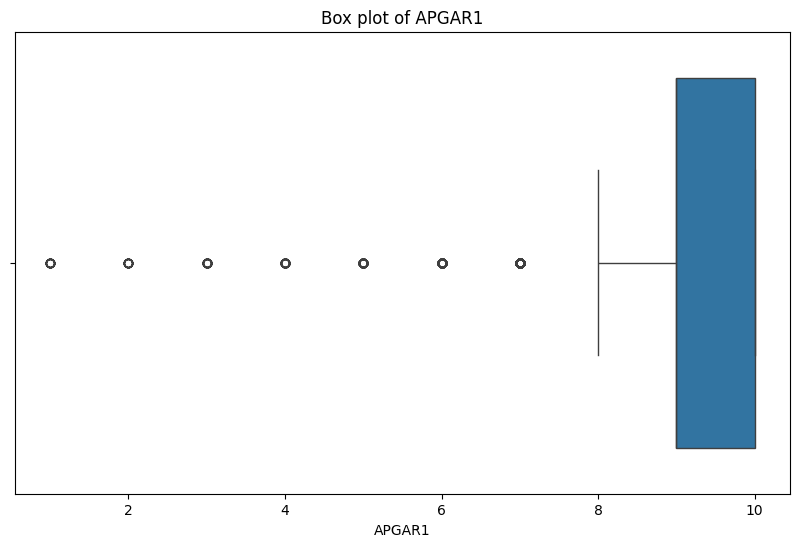


Analyzing column: APGAR2


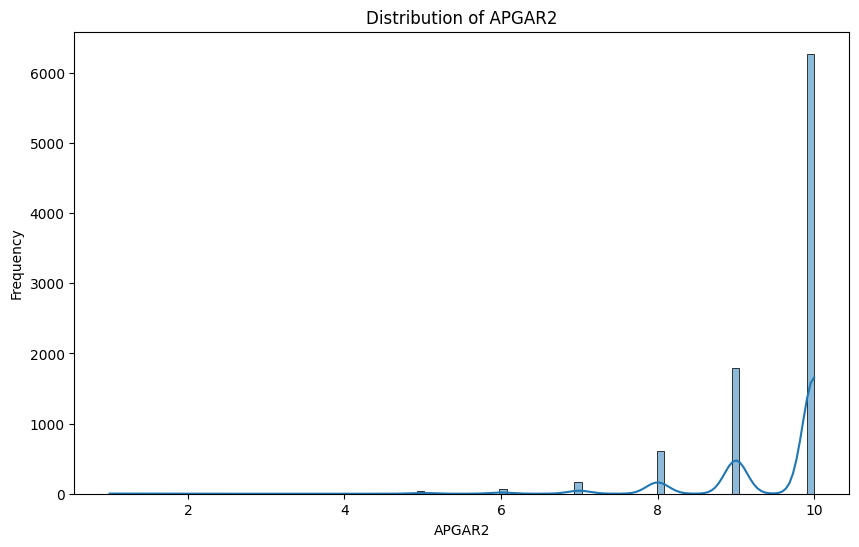

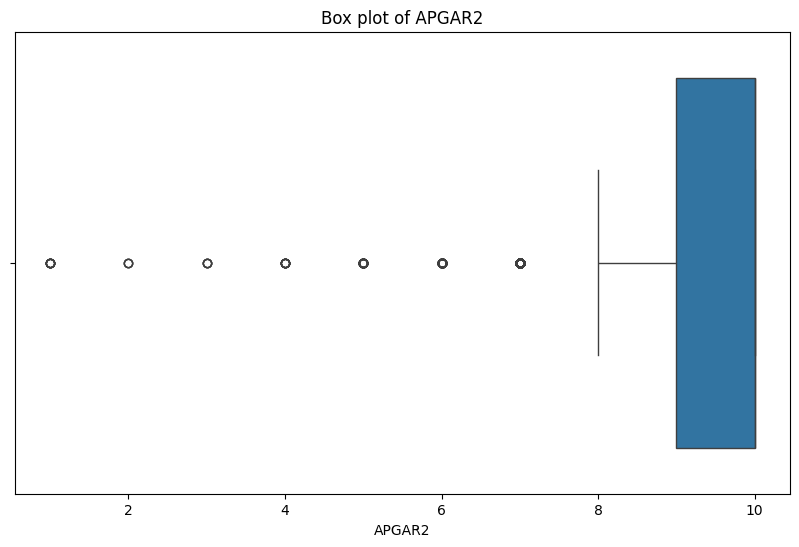


Analyzing column: EDAD MADRE


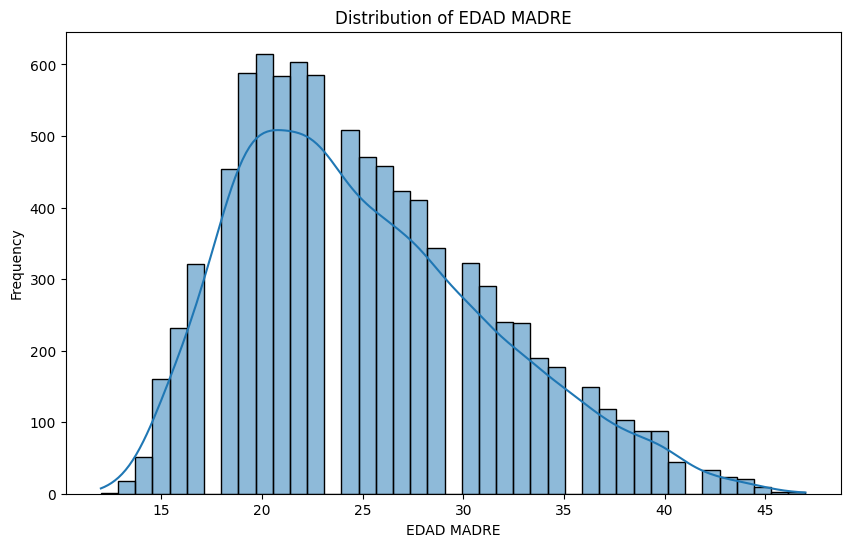

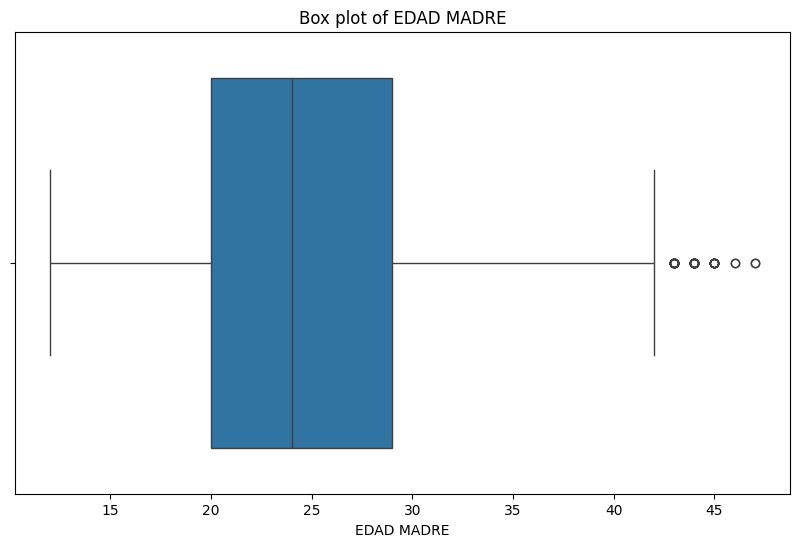


Analyzing column: ULTIMO ANO APROBADO MADRE


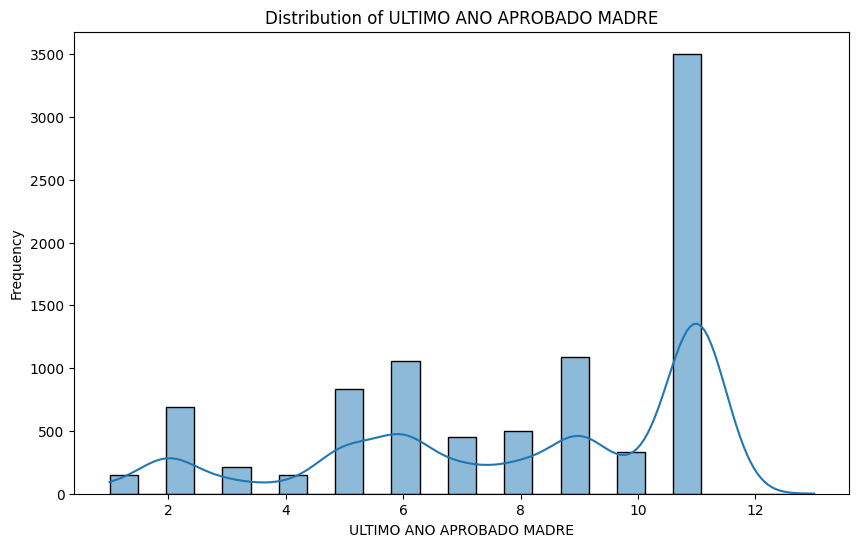

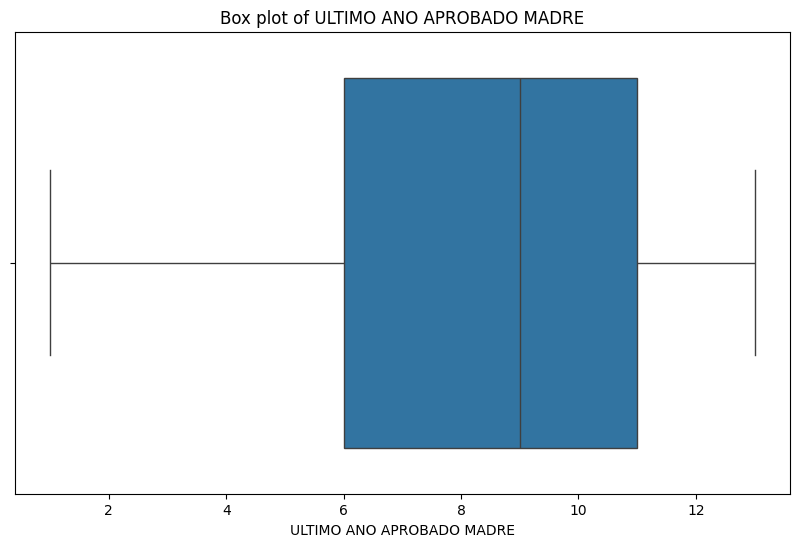


Analyzing column: NUMERO HIJOS NACIDOS VIVOS


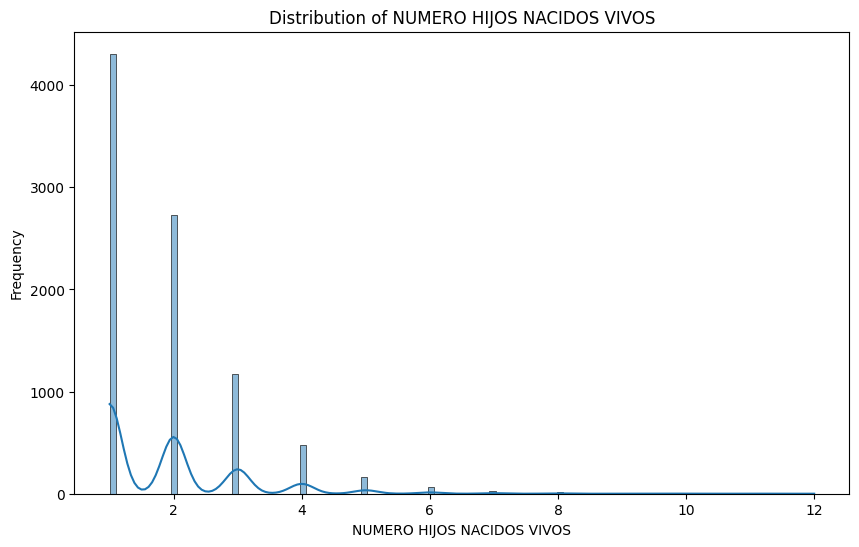

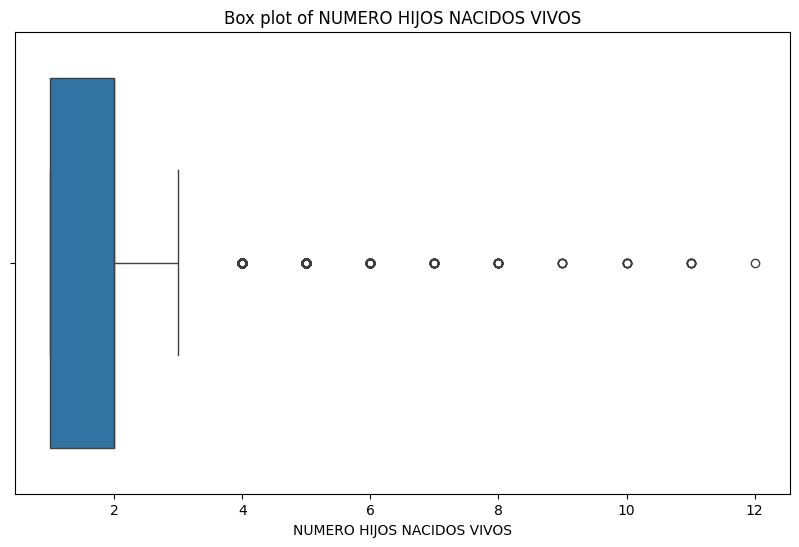


Analyzing column: NUMERO EMBARAZOS


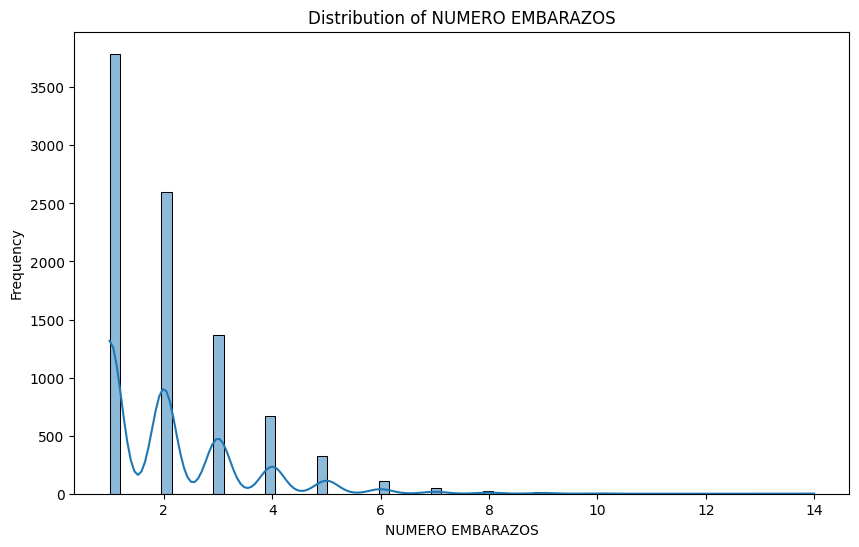

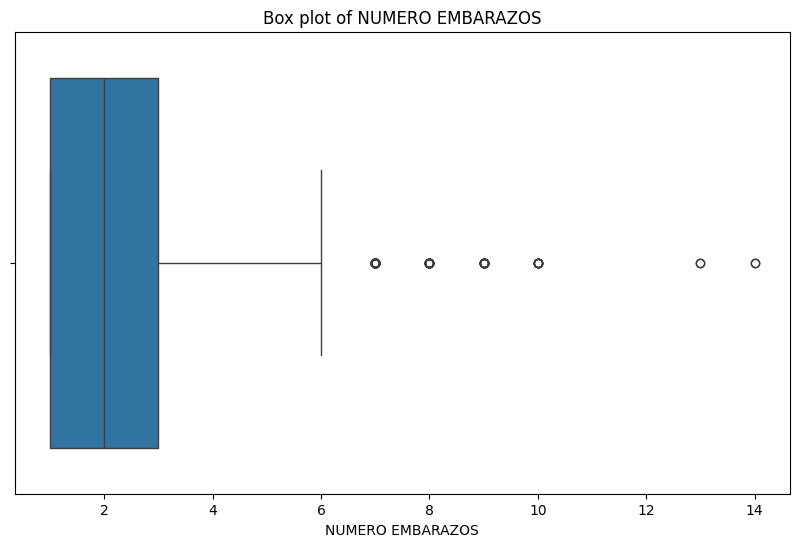


Analyzing column: EDAD PADRE


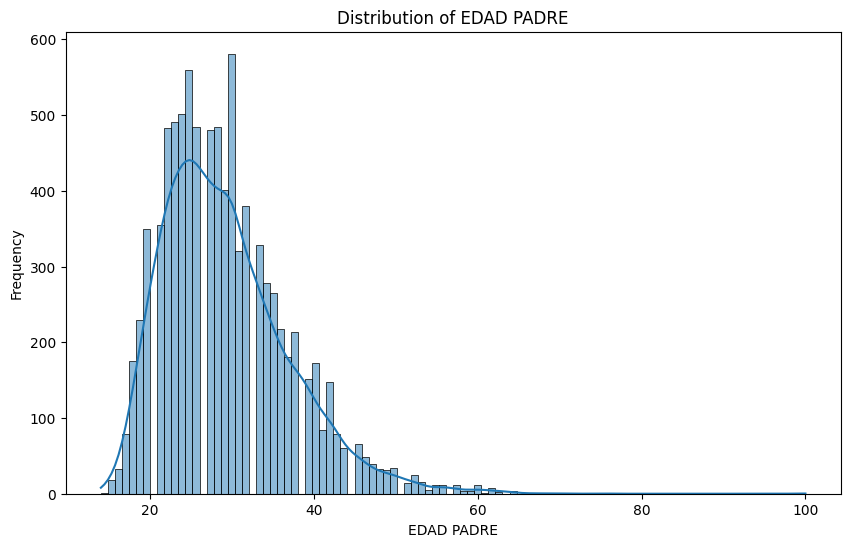

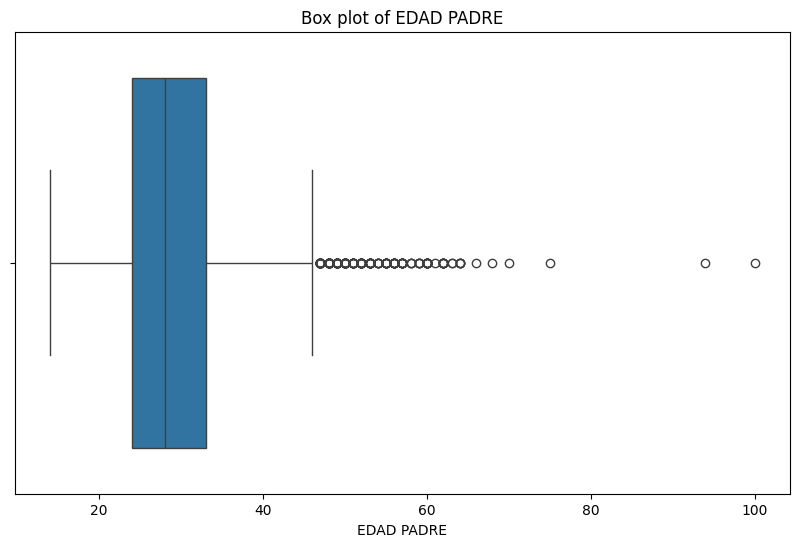

In [ ]:
# Identify numerical columns
numerical_cols = df_filtrado.select_dtypes(include=np.number).columns.tolist()

# Exclude potentially non-numerical columns that were included due to dtype
# 'ANO' and 'PERIODO DE REPORTE' are more like categorical/temporal indicators
numerical_cols_to_plot = [
    'PESO (Gramos)',
    'TALLA (CentImetros)',
    'TIEMPO DE GESTACION',
    'NUMERO CONSULTAS PRENATALES',
    'APGAR1',
    'APGAR2',
    'EDAD MADRE',
    'ULTIMO ANO APROBADO MADRE',
    'NUMERO HIJOS NACIDOS VIVOS',
    'NUMERO EMBARAZOS',
    'EDAD PADRE'
]

for col in numerical_cols_to_plot:
    print(f"\nAnalyzing column: {col}")

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_filtrado, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_filtrado, x=col)
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

Outliers removed for column: PESO (Gramos). New number of rows: 8718
Outliers removed for column: TALLA (CentImetros). New number of rows: 8705
Outliers removed for column: TIEMPO DE GESTACION. New number of rows: 8528
Outliers removed for column: NUMERO CONSULTAS PRENATALES. New number of rows: 7969
Outliers removed for column: APGAR1. New number of rows: 7574
Outliers removed for column: APGAR2. New number of rows: 5765
Outliers removed for column: EDAD MADRE. New number of rows: 5729
Outliers removed for column: ULTIMO ANO APROBADO MADRE. New number of rows: 5729
Outliers removed for column: NUMERO HIJOS NACIDOS VIVOS. New number of rows: 5271
Outliers removed for column: NUMERO EMBARAZOS. New number of rows: 4981
Outliers removed for column: EDAD PADRE. New number of rows: 4844

Shape of the DataFrame after removing outliers: (4844, 32)


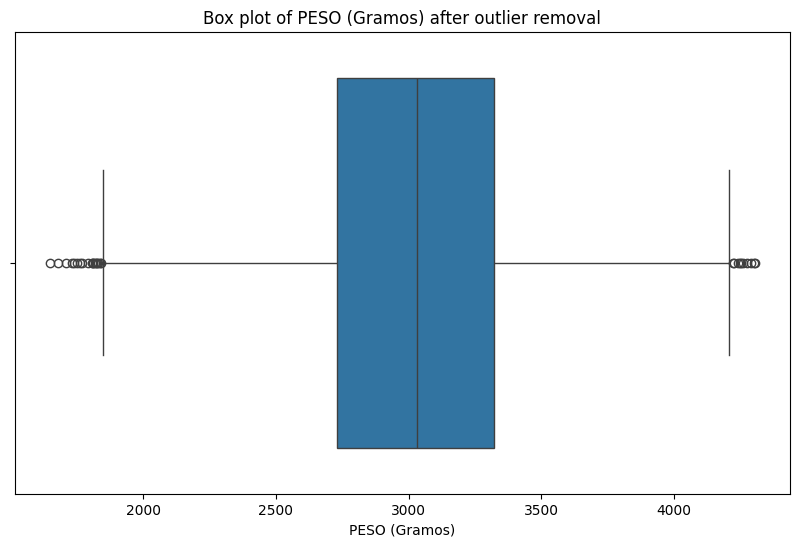

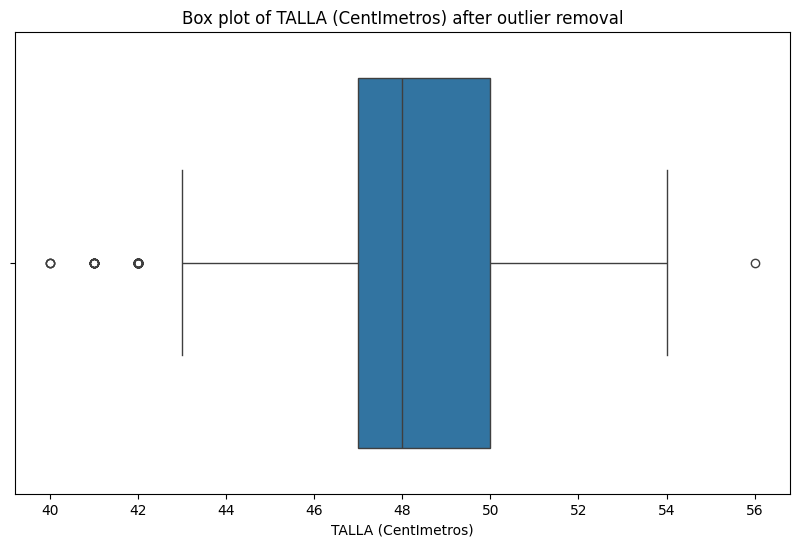

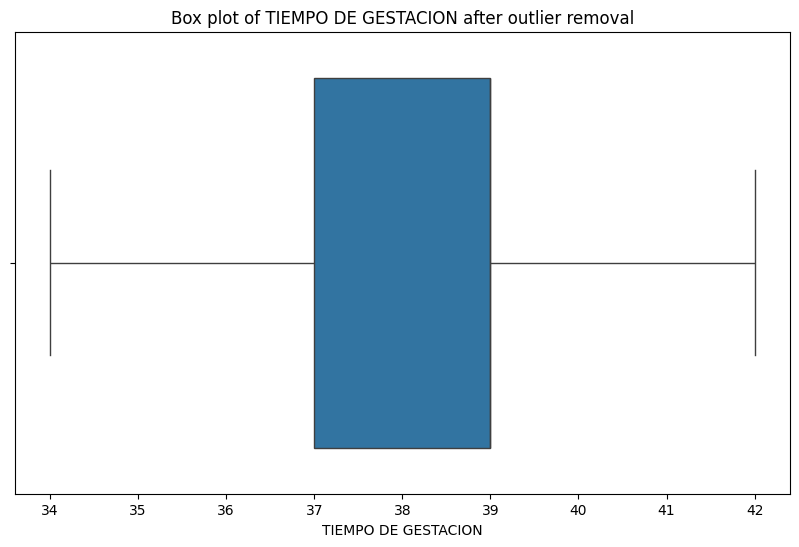

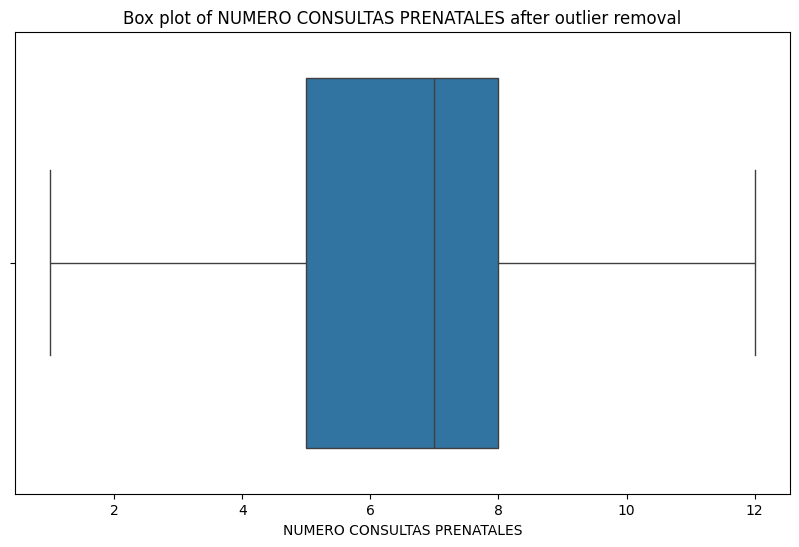

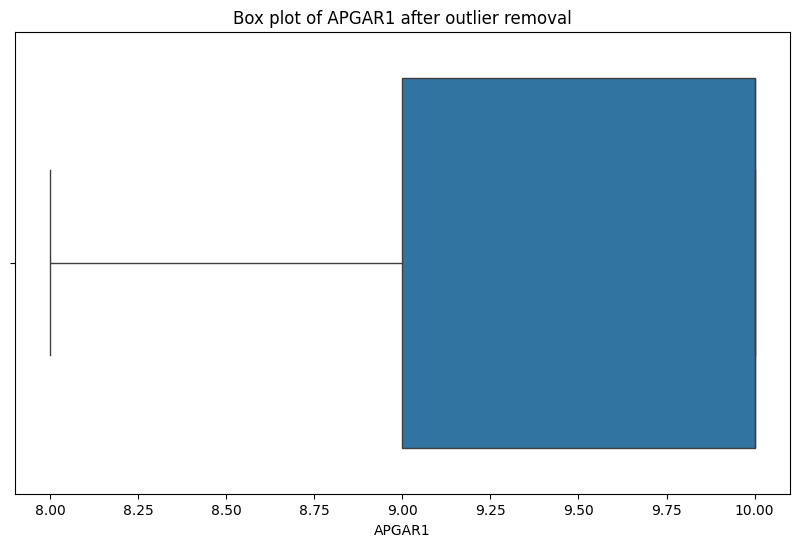

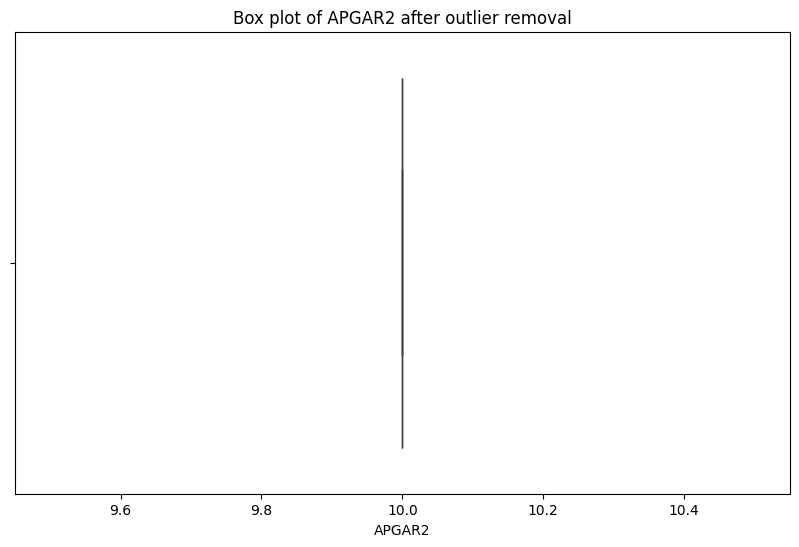

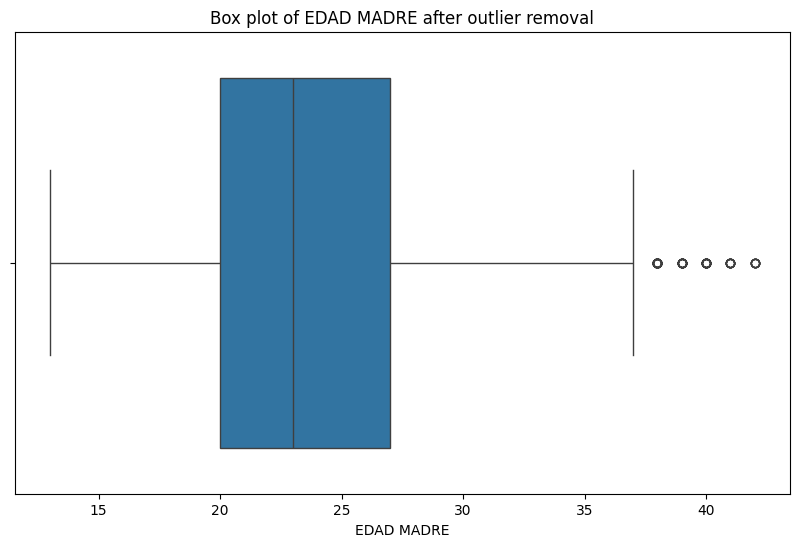

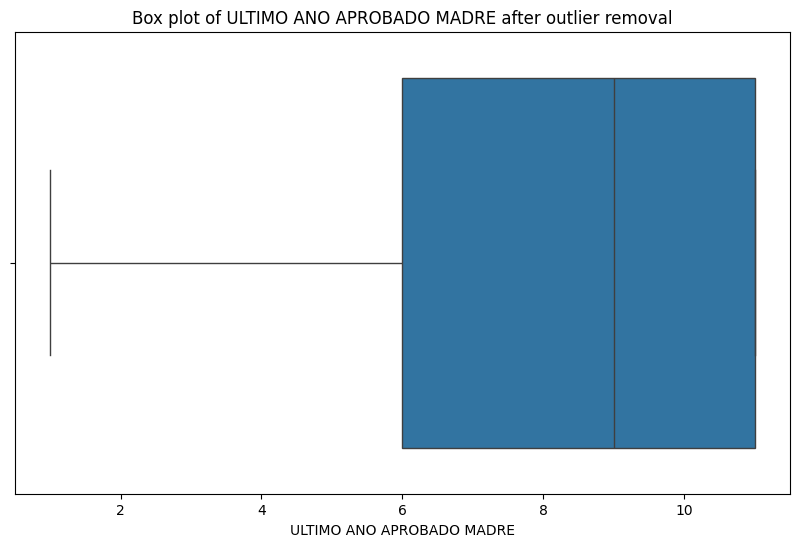

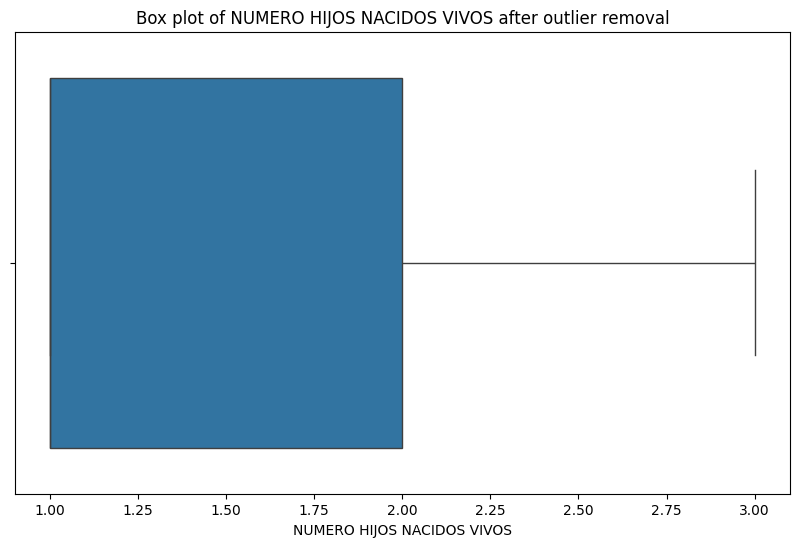

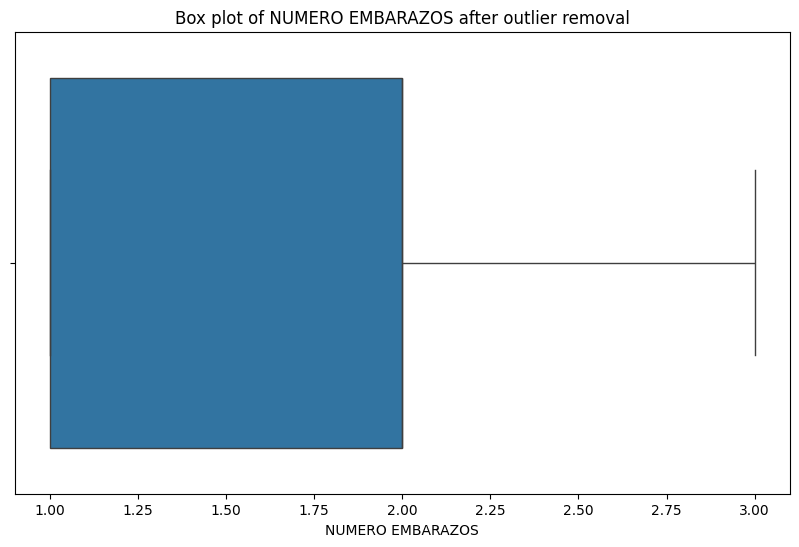

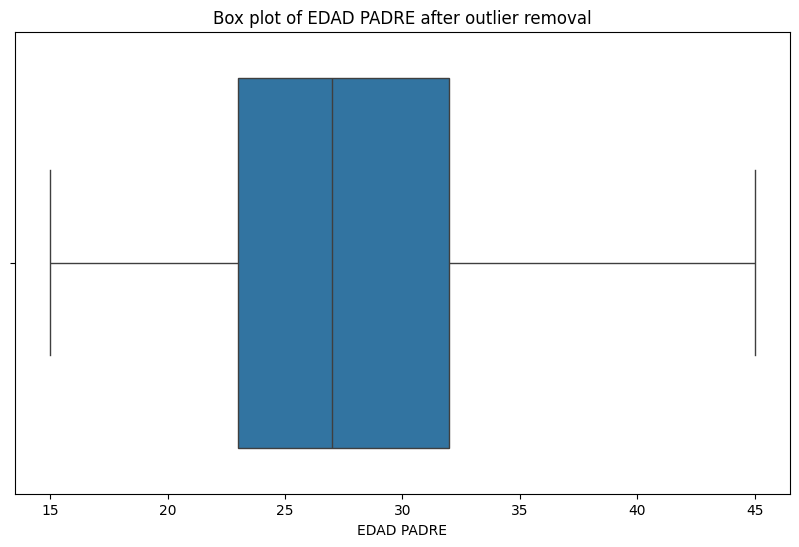

In [ ]:
# Identify numerical columns for outlier removal using IQR
numerical_cols_for_outliers = [
    'PESO (Gramos)',
    'TALLA (CentImetros)',
    'TIEMPO DE GESTACION',
    'NUMERO CONSULTAS PRENATALES',
    'APGAR1',
    'APGAR2',
    'EDAD MADRE',
    'ULTIMO ANO APROBADO MADRE',
    'NUMERO HIJOS NACIDOS VIVOS',
    'NUMERO EMBARAZOS',
    'EDAD PADRE'
]

df_no_outliers = df_filtrado.copy()

for col in numerical_cols_for_outliers:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    print(f"Outliers removed for column: {col}. New number of rows: {df_no_outliers.shape[0]}")

# Display the shape of the DataFrame after removing outliers
print(f"\nShape of the DataFrame after removing outliers: {df_no_outliers.shape}")

# Verify that there are no outliers remaining in the specified numerical columns by plotting box plots again
for col in numerical_cols_for_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_no_outliers, x=col)
    plt.title(f'Box plot of {col} after outlier removal')
    plt.xlabel(col)
    plt.show()


Analyzing column: PESO (Gramos)


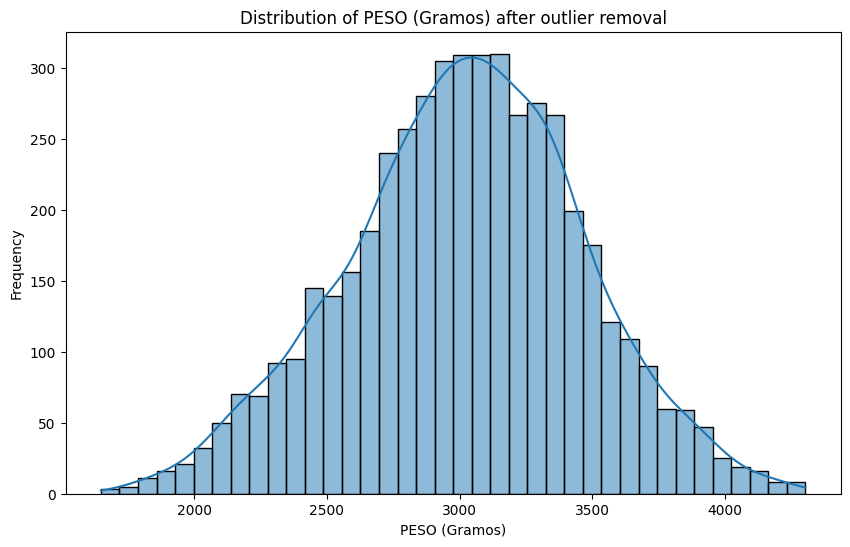


Analyzing column: TALLA (CentImetros)


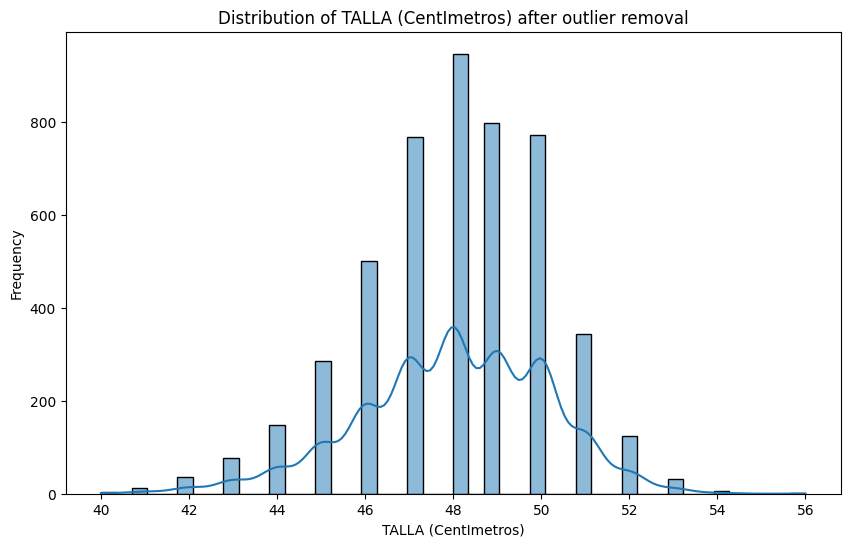


Analyzing column: TIEMPO DE GESTACION


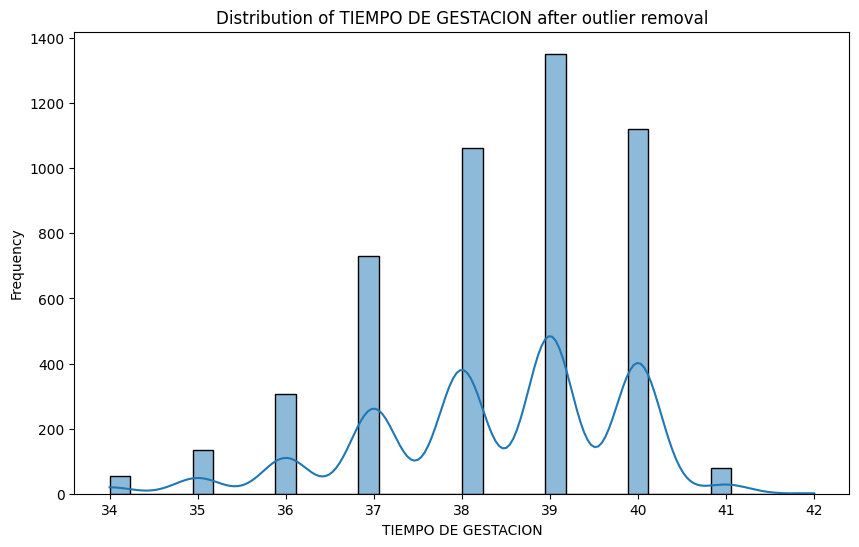


Analyzing column: NUMERO CONSULTAS PRENATALES


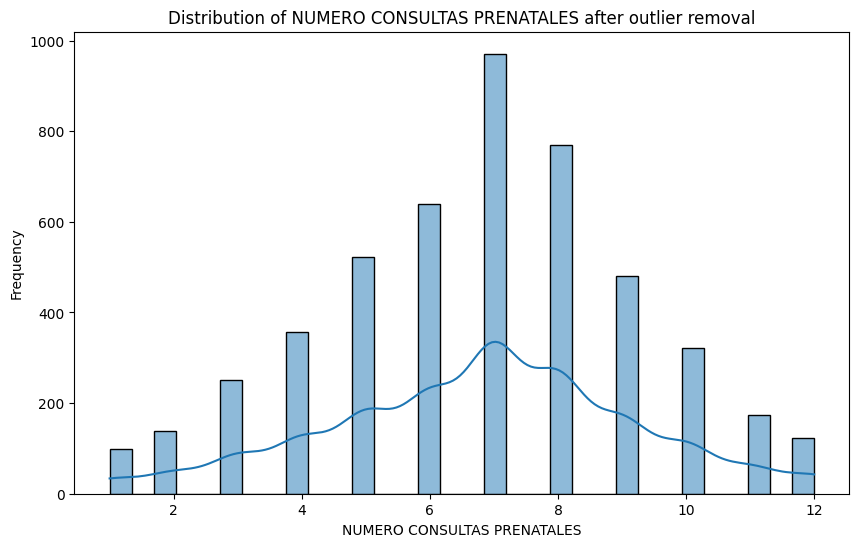


Analyzing column: APGAR1


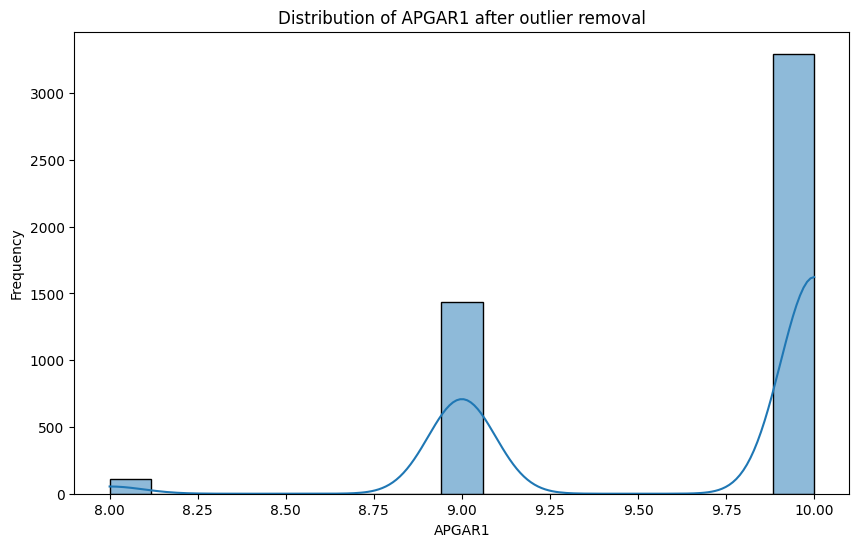


Analyzing column: APGAR2


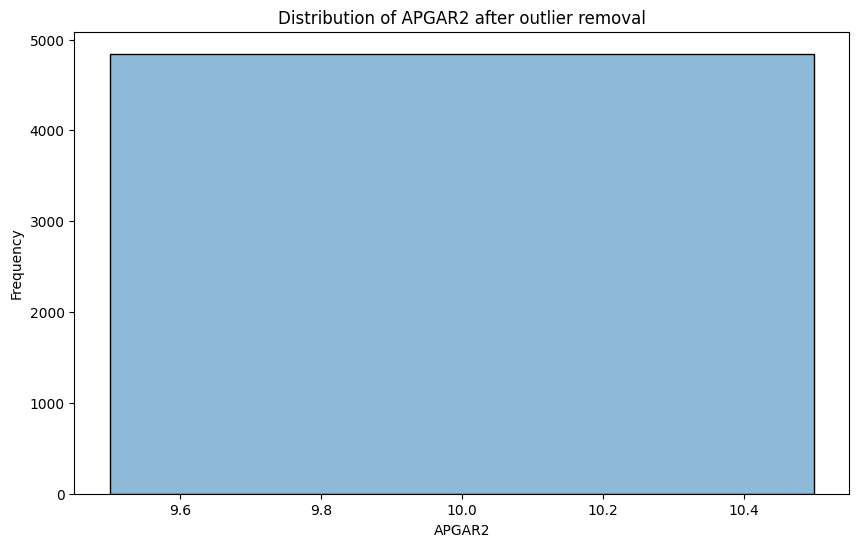


Analyzing column: EDAD MADRE


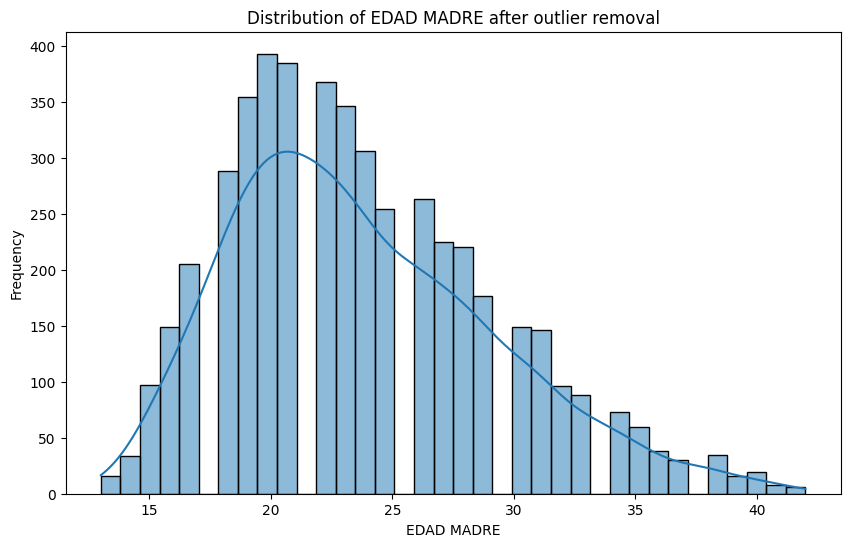


Analyzing column: ULTIMO ANO APROBADO MADRE


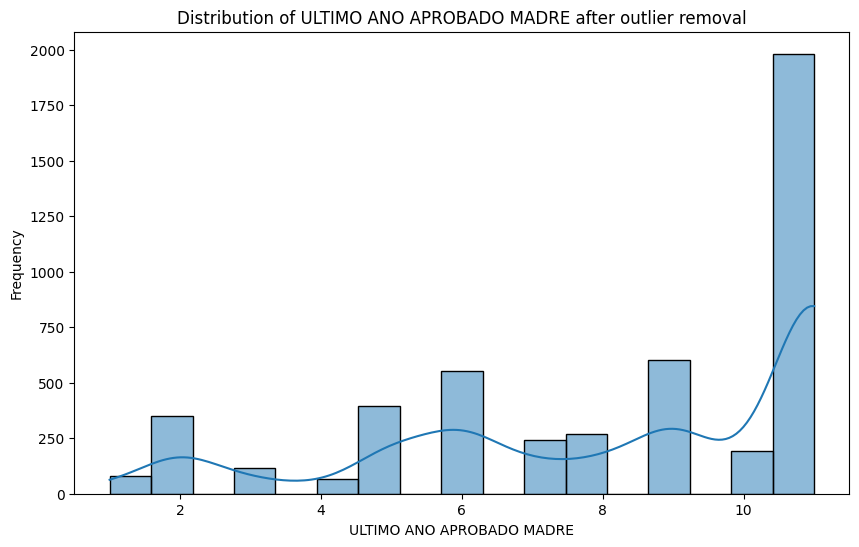


Analyzing column: NUMERO HIJOS NACIDOS VIVOS


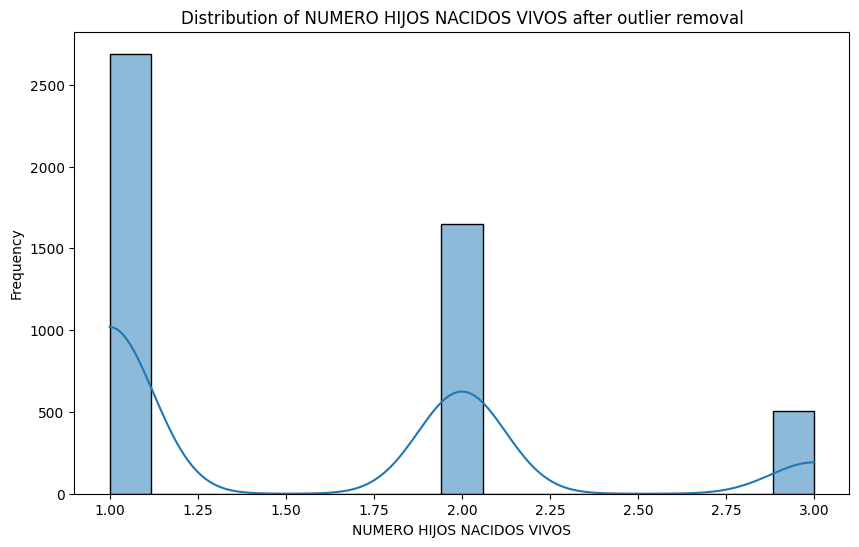


Analyzing column: NUMERO EMBARAZOS


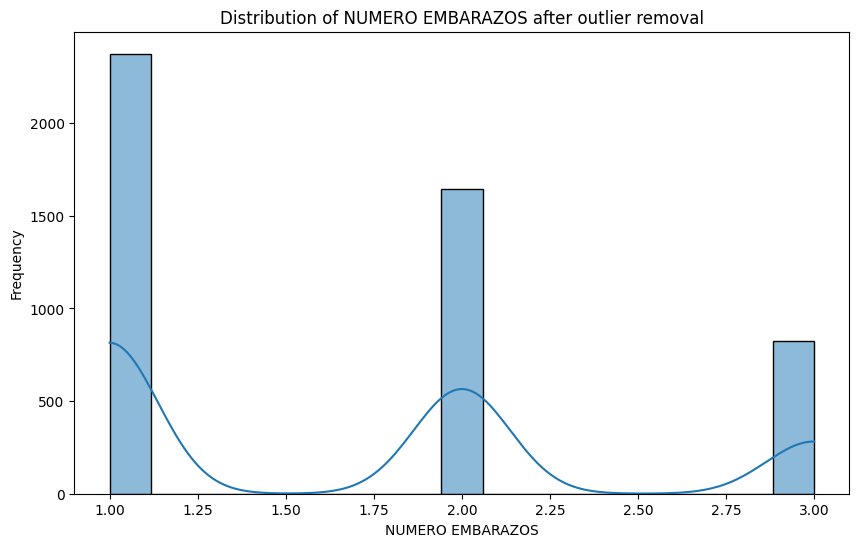


Analyzing column: EDAD PADRE


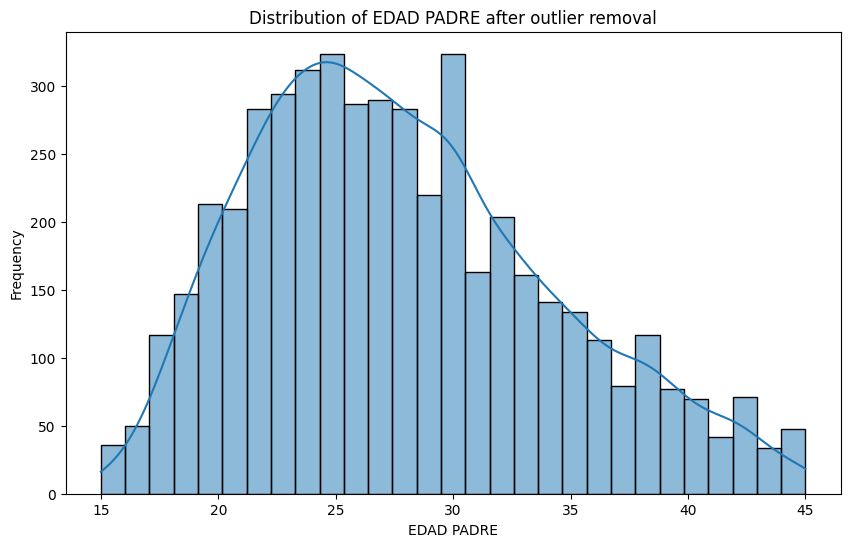

In [ ]:
# Identify numerical columns for plotting histograms
numerical_cols_to_plot = [
    'PESO (Gramos)',
    'TALLA (CentImetros)',
    'TIEMPO DE GESTACION',
    'NUMERO CONSULTAS PRENATALES',
    'APGAR1',
    'APGAR2',
    'EDAD MADRE',
    'ULTIMO ANO APROBADO MADRE',
    'NUMERO HIJOS NACIDOS VIVOS',
    'NUMERO EMBARAZOS',
    'EDAD PADRE'
]

for col in numerical_cols_to_plot:
    print(f"\nAnalyzing column: {col}")

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_no_outliers, x=col, kde=True)
    plt.title(f'Distribution of {col} after outlier removal')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
from scipy import stats
import statsmodels.api as sm

# Identify continuous numerical columns for normality tests
# Based on the histograms and box plots, these columns appear to be continuous and numerical.
continuous_numerical_cols = [
    'PESO (Gramos)',
    'TALLA (CentImetros)',
    'TIEMPO DE GESTACION',
    'NUMERO CONSULTAS PRENATALES',
    'APGAR1',
    'APGAR2',
    'EDAD MADRE',
    'ULTIMO ANO APROBADO MADRE',
    'EDAD PADRE'
]

print("Performing Normality Tests on Continuous Numerical Variables:")

for col in continuous_numerical_cols:
    print(f"\n--- {col} ---")

    # 1. Shapiro-Wilk Test
    # Shapiro-Wilk test is generally preferred for sample sizes less than 5000.
    if len(df_no_outliers[col]) < 5000:
        shapiro_test = stats.shapiro(df_no_outliers[col])
        print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")
    else:
        print("Shapiro-Wilk Test: Sample size is too large (>5000) for this test.")

    # 2. Kolmogorov-Smirnov Test (using kstest with estimated parameters)
    # Note: kstest can be used for normality testing by comparing against the normal distribution CDF.
    # When parameters (mean and std dev) are estimated from the data, the p-value
    # interpretation is not strictly the same as the Lilliefors test, but it's a common approach.
    mean = df_no_outliers[col].mean()
    std = df_no_outliers[col].std()
    kolmogorov_test = stats.kstest(df_no_outliers[col], lambda x: stats.norm.cdf(x, mean, std))
    print(f"Kolmogorov-Smirnov Test: Statistic={kolmogorov_test.statistic:.4f}, p-value={kolmogorov_test.pvalue:.4f}")


    # 3. Anderson-Darling Test
    anderson_test = stats.anderson(df_no_outliers[col], dist='norm')
    print(f"Anderson-Darling Test:")
    print(f"  Statistic: {anderson_test.statistic:.4f}")
    for i in range(len(anderson_test.critical_values)):
        print(f"  Critical Value ({anderson_test.significance_level[i]}%): {anderson_test.critical_values[i]:.4f}")


    # 4. Jarque-Bera Test
    # Jarque-Bera test is suitable for larger sample sizes and tests for skewness and kurtosis.
    jarque_bera_test = sm.stats.jarque_bera(df_no_outliers[col])
    print(f"Jarque-Bera Test: Statistic={jarque_bera_test[0]:.4f}, p-value={jarque_bera_test[1]:.4f}")

Performing Normality Tests on Continuous Numerical Variables:

--- PESO (Gramos) ---
Shapiro-Wilk Test: Statistic=0.9979, p-value=0.0000
Kolmogorov-Smirnov Test: Statistic=0.0196, p-value=0.0479
Anderson-Darling Test:
  Statistic: 2.6608
  Critical Value (15.0%): 0.5760
  Critical Value (10.0%): 0.6550
  Critical Value (5.0%): 0.7860
  Critical Value (2.5%): 0.9170
  Critical Value (1.0%): 1.0910
Jarque-Bera Test: Statistic=12.8265, p-value=0.0016

--- TALLA (CentImetros) ---
Shapiro-Wilk Test: Statistic=0.9724, p-value=0.0000
Kolmogorov-Smirnov Test: Statistic=0.1175, p-value=0.0000
Anderson-Darling Test:
  Statistic: 53.9711
  Critical Value (15.0%): 0.5760
  Critical Value (10.0%): 0.6550
  Critical Value (5.0%): 0.7860
  Critical Value (2.5%): 0.9170
  Critical Value (1.0%): 1.0910
Jarque-Bera Test: Statistic=121.2792, p-value=0.0000

--- TIEMPO DE GESTACION ---
Shapiro-Wilk Test: Statistic=0.9190, p-value=0.0000
Kolmogorov-Smirnov Test: Statistic=0.1933, p-value=0.0000
Anderson-Da

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2148: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:2263: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. Th

Generating QQ Plots for Continuous Numerical Variables:

--- QQ Plot for PESO (Gramos) ---


<Figure size 800x600 with 0 Axes>

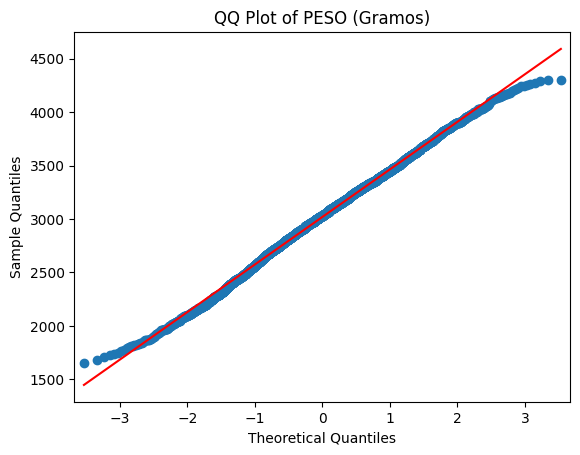


--- QQ Plot for TALLA (CentImetros) ---


<Figure size 800x600 with 0 Axes>

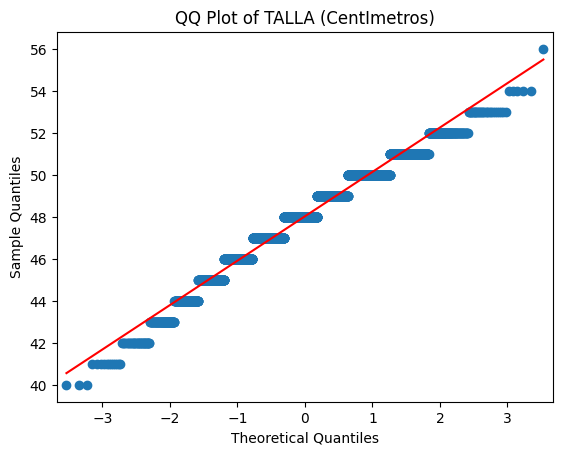


--- QQ Plot for TIEMPO DE GESTACION ---


<Figure size 800x600 with 0 Axes>

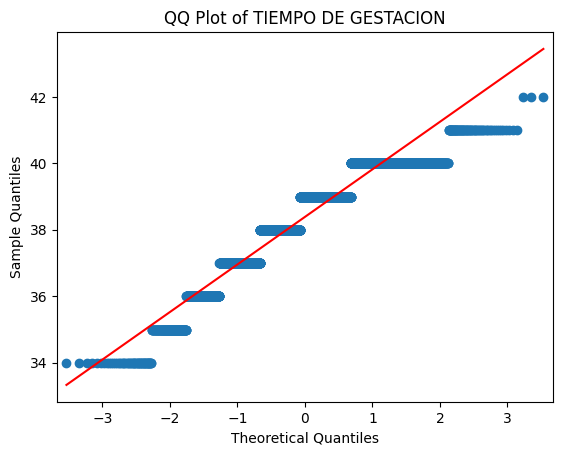


--- QQ Plot for NUMERO CONSULTAS PRENATALES ---


<Figure size 800x600 with 0 Axes>

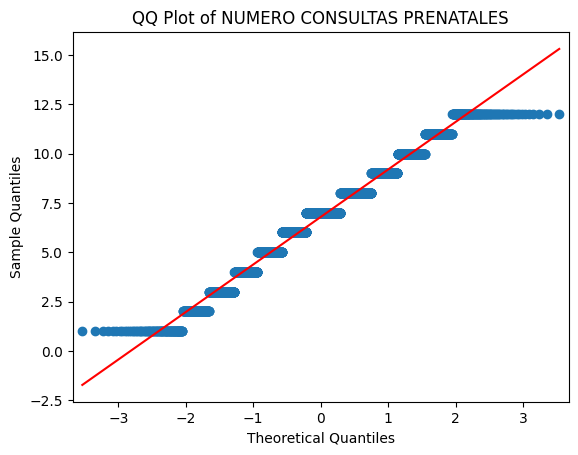


--- QQ Plot for APGAR1 ---


<Figure size 800x600 with 0 Axes>

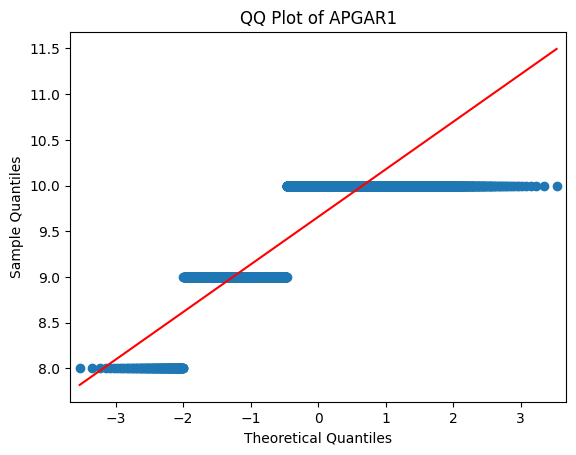


--- QQ Plot for EDAD MADRE ---


<Figure size 800x600 with 0 Axes>

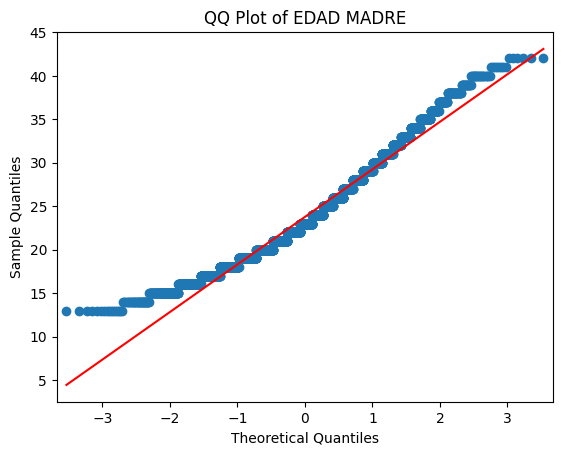


--- QQ Plot for ULTIMO ANO APROBADO MADRE ---


<Figure size 800x600 with 0 Axes>

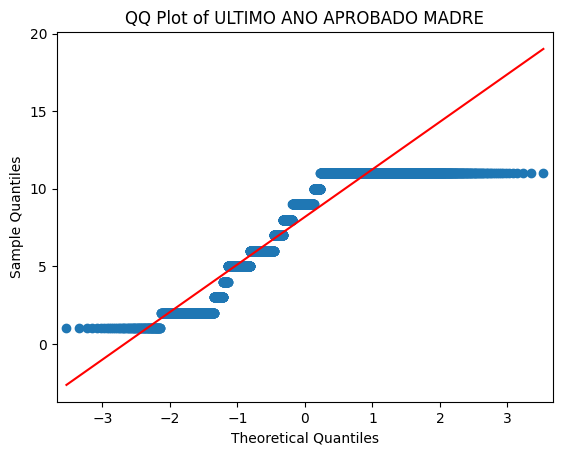


--- QQ Plot for EDAD PADRE ---


<Figure size 800x600 with 0 Axes>

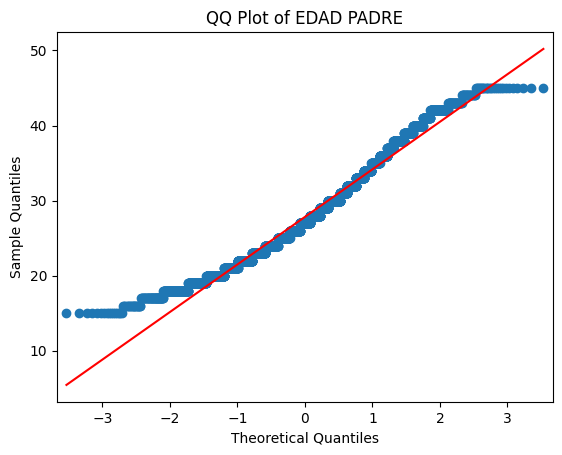

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Identify continuous numerical columns for QQ plots (excluding APGAR2)
continuous_numerical_cols_qq = [
    'PESO (Gramos)',
    'TALLA (CentImetros)',
    'TIEMPO DE GESTACION',
    'NUMERO CONSULTAS PRENATALES',
    'APGAR1',
    'EDAD MADRE',
    'ULTIMO ANO APROBADO MADRE',
    'EDAD PADRE'
]

print("Generating QQ Plots for Continuous Numerical Variables:")

for col in continuous_numerical_cols_qq:
    print(f"\n--- QQ Plot for {col} ---")
    plt.figure(figsize=(8, 6))
    sm.qqplot(df_no_outliers[col], line='s') # 's' - standardized line
    plt.title(f'QQ Plot of {col}')
    plt.show()

In [ ]:
# Get unique values from the 'MUNICIPIO RESIDENCIA' column
unique_cities = df_no_outliers['MUNICIPIO RESIDENCIA'].unique()

# Display the unique cities
print("Ciudades representadas en el dataset:")
for city in unique_cities:
    print(city)

NameError: name 'df_no_outliers' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("nacimiento.csv")

# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Identify numerical columns for outlier removal using IQR
numerical_cols_for_outliers = [
    'PESO (Gramos)',
    'TALLA (CentImetros)',
    'TIEMPO DE GESTACION',
    'NUMERO CONSULTAS PRENATALES',
    'APGAR1',
    'APGAR2',
    'EDAD MADRE',
    'ULTIMO ANO APROBADO MADRE',
    'NUMERO HIJOS NACIDOS VIVOS',
    'NUMERO EMBARAZOS',
    'EDAD PADRE'
]

df_no_outliers = df_filtrado.copy()

for col in numerical_cols_for_outliers:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

# Get unique values from the 'MUNICIPIO RESIDENCIA' column
unique_cities = df_no_outliers['MUNICIPIO RESIDENCIA'].unique()

# Display the unique cities
print("Ciudades representadas en el dataset:")
for city in unique_cities:
    print(city)